<a href="https://colab.research.google.com/github/shreyashguptas/Machine-Learning-for-Dummies/blob/main/chapters/Chapter%20x%20-%20Introduction%20to%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepLearning Course
----

Course link: https://app.datacamp.com/learn/courses/introduction-to-deep-learning-with-pytorch

> ### Note: The basic pre-requisites for this Deep Learning part is that you have gone through the Machine Learning notebook before doing Deep Learning.

In [63]:
# %pip install pandas numpy torch matplotlib

### Neural Network Overview

Here is how a very basic neural network looks like. It's inspired by the human brain and that's why we call it neurons and neural networks.

![neural-network-overview](../images/neural-network-overview.png)

### Importing the Torch Library
---
to import the torch library all you have to do is run the following code:

In [64]:
import torch

## Tensor Attributes

### What are tensor attributes?
Tensors are the basic building blocks of data in PyTorch. They are similar to arrays or matrices, but with some additional features that make them useful for deep learning tasks.

Tensor as different attributes
1. Tensor Shape
2. Tensor Data Type
3. Tensor Device

### 1. Tensor Shape

In [65]:
Lst = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(Lst)
tensor.shape

torch.Size([2, 3])

### 2. Tensor Data Type

PyTorch supports various data types for tensors, categorized as follows:

Floating-point Types:
• torch.float32 or torch.float: 32-bit floating-point
• torch.float64 or torch.double: 64-bit floating-point
• torch.float16 or torch.half: 16-bit floating-point
• torch.bfloat16: Brain floating-point (optimized for machine learning)

Integer Types:
• torch.int8: 8-bit signed integer
• torch.uint8: 8-bit unsigned integer
• torch.int16 or torch.short: 16-bit signed integer
• torch.int32 or torch.int: 32-bit signed integer
• torch.int64 or torch.long: 64-bit signed integer

Boolean Type:
• torch.bool: Boolean (True or False)

Complex Types:
• torch.complex64: Complex number (32-bit float for real and imaginary parts)
• torch.complex128 or torch.cdouble: Complex number (64-bit float for real and imaginary parts)


In [66]:
tensor.dtype

torch.int64

### 3. Tensor Device

When you run tensor.device on a PyTorch tensor, it returns the device where the tensor is stored. Common device types include:

1. CPU: Tensor is in system memory, processed by the CPU.
   Example: device(type='cpu')

2. CUDA: Tensor is in GPU memory, processed by an NVIDIA GPU.
   Examples:
   - device(type='cuda')         # Current CUDA device
   - device(type='cuda', index=0) # Specific CUDA device
   - device(type='cuda:1')       # CUDA device 1

3. MPS (Metal Performance Shaders): For Apple Silicon GPUs on macOS.
   Example: device(type='mps')

4. XLA: Used with PyTorch/XLA for TPU acceleration.
   Example: device(type='xla')

5. IPU: For Graphcore Intelligence Processing Units.
   Example: device(type='ipu')

6. XPU: For Intel GPUs.
   Example: device(type='xpu')

7. Meta: A special device type for operations not requiring actual computation.
   Example: device(type='meta')

Note: CPU and CUDA are the most common device types. The availability of other types 
depends on your hardware and PyTorch installation.

In [67]:
tensor.device

device(type='cpu')

## Creating our own Neural Network
----
![creating-neural-network-1](../images/creating-neural-network-1.png)

In [68]:
import torch.nn as nn

In [69]:
# Create input_tensor with three features
input_tensor = torch.tensor(
    [[0.342, 0.543, -0.4533]]
)

A linear layer takes an input, applied a linear function, and returns output.

What happens in a linear layer is 'For input 'X', weights 'W0' and bias 'b0', the linear layer performs

y0 = W0*X + b0

In PyTorch: Output = W0 @ input + b0

So when we call the nn.linear function below, it calls the Weights and Biases randomly so they are not yet useful. But we tune them in models so the output is meaningful.

In [70]:
# Define our first linear layer. in_features is the number of input layers and out_features is the number of output layers. Look at the image under 'Creating our own Neural Network'.
linear_layer = nn.Linear(in_features=3, out_features=2)

In [71]:
# Pass input through linear layer
output = linear_layer(input_tensor)

output

tensor([[-0.0084,  0.1069]], grad_fn=<AddmmBackward0>)

### Getting to know the linear layer operation

- Each linear layer has a .weight and .bias
- Each linear layer multiples its respective input with layer weights and adds biases
- Even with multiple stacked linear layers, output still has linear relationship with input.

In [72]:
linear_layer.weight

Parameter containing:
tensor([[-0.5330,  0.3063,  0.2679],
        [ 0.3688,  0.0437, -0.2508]], requires_grad=True)

In [73]:
linear_layer.bias

Parameter containing:
tensor([ 0.1290, -0.1566], requires_grad=True)

### Lets visualize the Linear_layers with their weights and biases
# Ignore the code block below, it is just for visualization

/var/folders/wm/znp8c4pd0r72qm3gq7rpvwn40000gn/T/ipykernel_1075/4206505998.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


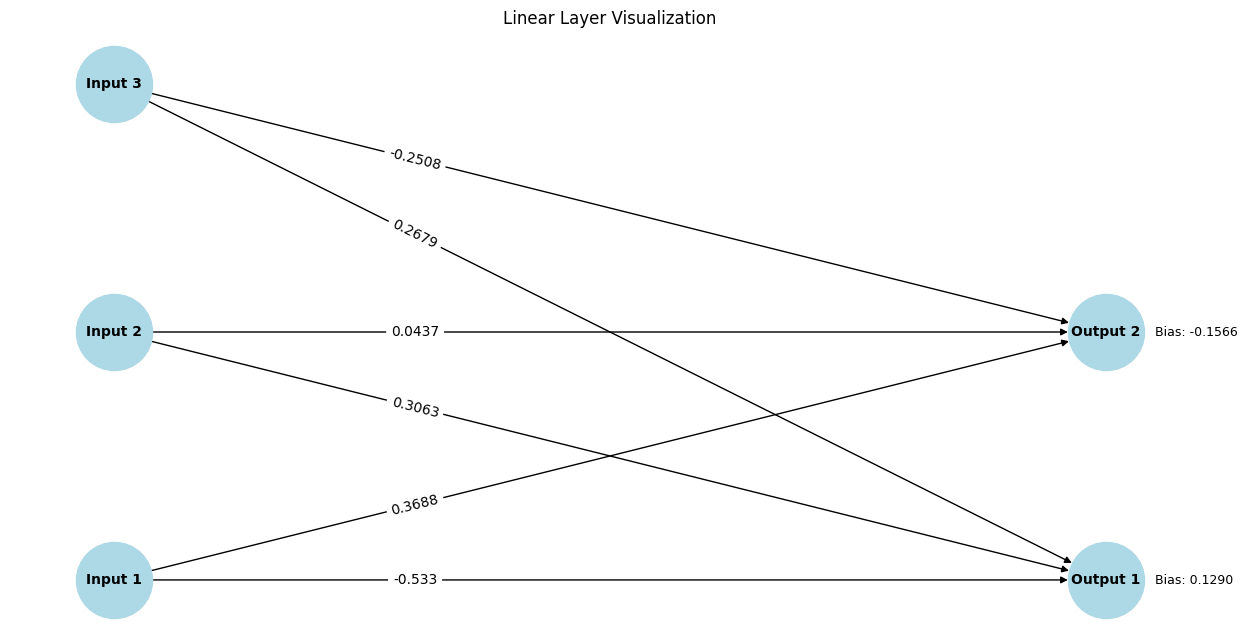

Output tensor:
tensor([[-0.0084,  0.1069]], grad_fn=<AddmmBackward0>)


In [74]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_linear_layer(linear_layer, input_tensor, output_tensor):
    # Create a directed graph
    G = nx.DiGraph()

    # Add input nodes
    for i in range(input_tensor.shape[1]):
        G.add_node(f"Input {i+1}", pos=(0, i))

    # Add output nodes
    for i in range(output_tensor.shape[1]):
        G.add_node(f"Output {i+1}", pos=(2, i))

    # Add edges with weights
    for i in range(input_tensor.shape[1]):
        for j in range(output_tensor.shape[1]):
            weight = linear_layer.weight[j, i].item()
            G.add_edge(f"Input {i+1}", f"Output {j+1}", weight=round(weight, 4))

    # Set up the plot
    plt.figure(figsize=(12, 6))
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=10, font_weight='bold')

    # Add edge labels (weights) with adjusted positions
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

    # Add bias labels
    for i, bias in enumerate(linear_layer.bias):
        plt.text(2.1, i, f'Bias: {bias.item():.4f}', 
                 fontsize=9, verticalalignment='center')

    plt.title("Linear Layer Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the linear layer
visualize_linear_layer(linear_layer, input_tensor, output)

# Print the output tensor
print("Output tensor:")
print(output)

Networks with only linear layers are called **fully connected layers**. Each neuron in one layer is connected to each neuron in the next layer.

# Each **nn.Linear** line of code is a Linear Layer

Here is a visual

![neural-network-linear-layers](../images/neural-network-linear-layers.png)

## Stacking layers with nn.Sequential()
- A PyTorch container that allows us to stack multiple neural network modules in sequence.

In [75]:
# Create network with three linear layers
model = nn.Sequential(
    nn.Linear (10, 18),
    nn.Linear (18, 20),
    nn.Linear (20, 5)
)
model

Sequential(
  (0): Linear(in_features=10, out_features=18, bias=True)
  (1): Linear(in_features=18, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=5, bias=True)
)

In [76]:
# Create input_tensor with ten features
input_tensor_2 = torch.tensor(
    [[0.342, 0.543, -0.4533, 0.434, -0.3435, 0.3523, -0.3424, 0.3453, 0.87509, -0.3425]]
)

print('This is a 1x10 dimentions tensor', input_tensor_2)

This is a 1x10 dimentions tensor tensor([[ 0.3420,  0.5430, -0.4533,  0.4340, -0.3435,  0.3523, -0.3424,  0.3453,
          0.8751, -0.3425]])


In [77]:
output_tensor = model(input_tensor_2)
print('here we received an output of 1x5 dimensions', output_tensor)

here we received an output of 1x5 dimensions tensor([[-0.0547,  0.1139,  0.1321,  0.0467, -0.0807]],
       grad_fn=<AddmmBackward0>)


## Exercise #1

### Your first neural network
In this exercise, you will implement a small neural network containing two linear layers. The first layer takes an eight-dimensional input, and the last layer outputs a one-dimensional tensor.

The torch package and the torch.nn package have already been imported for you.

Create a neural network of two linear layers that takes a tensor of dimensions 1x8 as input, representing 8 features, and outputs a tensor of dimensions 1x1
Use any output dimension for the first layer you want.

In [78]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Implement a small neural network with exactly two linear layers
model = nn.Sequential(
    nn.Linear(8, 4),  # First linear layer with an intermediate output dimension
    nn.Linear(4, 1)   # Second linear layer to produce the final output
)

output = model(input_tensor)
print(output)

tensor([[1.1825]], grad_fn=<AddmmBackward0>)


### Stacking linear layers
Nice work building your first network with two linear layers. Let's stack some more layers. Remember that a neural network can have as many hidden layers as we want, provided the inputs and outputs line up.

The aim of this exercise is for you to become comfortable thinking about the inputs and outputs of each successive layer in a PyTorch neural network.

This network is designed to ingest the following input:

`
input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1, 5, 3, 6, 9]])
`

- Instructions: Reorder the items provided to create a neural network with three hidden layers and an output of size 2.

In [79]:
# Explanation for the code below:
# 1. It takes an input tensor with 12 elements, as specified in the question.
# 2. It has three hidden layers:
#    - The first layer transforms from 12 to 20 dimensions
#    - The second layer transforms from 20 to 14 dimensions
#    - The third layer transforms from 14 to 3 dimensions
# 3. The final layer outputs a tensor of size 2, as required.

# The nn.Sequential module is used to stack these layers in order. Each nn.Linear layer performs a linear transformation on its input.
# The dimensions of each layer are chosen arbitrarily, but ensure that the output of one layer matches the input of the next.
# This structure allows the network to learn increasingly complex representations of the input data as it passes through each layer.

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1, 5, 3, 6, 9]])

model = nn.Sequential(
    nn.Linear(12, 20),  # First hidden layer
    nn.Linear(20, 14),   # Second hidden layer
    nn.Linear(14, 3),    # Third hidden layer
    nn.Linear(3, 2)     # Fourth the output layer
)

output = model(input_tensor)
print(output)

tensor([[-0.0975,  1.4123]], grad_fn=<AddmmBackward0>)


## There are multiple types of Layers

1. Linear (Fully Connected) Layers
2. Convolutional Layers
3. Recurrent Layers (LSTM, GRU, Simple RNN)
4. Pooling Layers (Max, Average, Global)
5. Normalization Layers (Batch, Layer, Instance)
6. Activation Layers (ReLU, Sigmoid, Tanh, Softmax)
7. Dropout Layers
8. Flatten Layers
9. Embedding Layers
10. Attention Layers
11. Transformer Layers
12. Residual Connections

# Activation Functions
**Activation Functions** add **non-linearity** to the network

### Why do we need activation functions?
Imagine a neural network as a big house with many rooms, and each neuron is like a light bulb in those rooms. Now, activation functions are like light switches for these bulbs.
Without switches (activation functions), the lights would always be on or off at the same brightness. This is boring and not very useful!
With switches (activation functions), we can control which lights are on, how bright they are, or even have dimmer switches for more control.
This control allows our neural network "house" to create complex lighting patterns, just like how real neural networks can learn complex patterns in data.

![Activation-layers](../images/activation-layers.png)

### Sigmoid function example with an Activation layer

- We use Sigmoid for binary classification.
- Sigmoid is used as the last step in network of linear layers is **equivalent** to tradtional logistic regression.

![sigmoid-function-example](../images/sigmoid-function-example.png)

Let me explain the limitations of sigmoid and softmax functions in a way that's easy to understand.

## Sigmoid Function Limitations

**Vanishing Gradient Problem**
Think of the sigmoid function like squeezing a balloon into a small box that only has space between 0 and 1. When you push really hard (large positive or negative numbers):
- The output gets stuck near 0 or 1
- The gradient becomes extremely small, almost zero
- This makes learning very slow or impossible, like trying to move through thick mud

**Not Zero-Centered**
- The sigmoid function's outputs are always positive (between 0 and 1)
- This creates a zigzag pattern during training, making it slower to converge
- It's like trying to walk straight while constantly being pulled to one side

**Computational Cost**
- The sigmoid function uses exponentials which are expensive to calculate
- This makes training slower compared to simpler functions like ReLU

## When to Use Each
**Use Sigmoid When:**
- You're doing binary classification
- You need outputs between 0 and 1
- You're working with gates in LSTM/GRU

In [80]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([6])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
output

tensor([0.9975])

In [81]:
model = nn.Sequential(
    nn.Linear(6, 4), # First Linear Layer
    nn.Linear(4, 1), # Second Linear Layer
    nn.Sigmoid() # Sigmoid Activation Function
)
model

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
  (2): Sigmoid()
)

### Softmax as an Activation Layer

![softmax-activation-function](../images/softmax-activation-function.png)

## Softmax Function Limitations

**Numerical Instability**
- When dealing with very large numbers, the exponentials can explode
- When dealing with very small numbers, they can vanish to zero
- Modern implementations solve this by subtracting the maximum value first

**Mutual Exclusivity**
- Softmax assumes classes are mutually exclusive (only one can be true)
- Not suitable for multi-label problems where multiple classes can be true simultaneously
- Like trying to say a picture contains both a cat AND a dog

## Better Alternatives

**For Hidden Layers:**
- ReLU is generally preferred over sigmoid
- It's faster and doesn't suffer from vanishing gradients as much
- However, ReLU can "die" if learning rates are too high

**For Output Layer:**
- Binary classification: Sigmoid is still good
- Multi-class classification: Softmax is appropriate
- Modern variations like Swish can sometimes perform better

## When to Use Each
**Use Softmax When:**
- You're doing multi-class classification
- You need probability distributions
- You want outputs that sum to 1

In [82]:
import torch
import torch.nn as nn

# Creating an input tensor
input_tensor = torch.tensor([[4.3, 6.1, 2.3]]) # 1. The outer brackets [ ] create a list, which represents a batch of inputs. The inner brackets [ ] represent a single sample within that batch. This structure creates a 2-dimensional tensor with the shape (1, 3), where: 1 is the batch size (number of samples) 3 is the number of features for each sample

# Apply softmax along the last dimension
probabilities = nn.Softmax(dim=1)
output_tensor = probabilities(input_tensor)

output_tensor

tensor([[0.1392, 0.8420, 0.0188]])

# Exercise 1.6

## The sigmoid and softmax functions
The sigmoid and softmax functions are two of the most popular activation functions in deep learning. They are both usually used as the last step of a neural network. Sigmoid functions are used for binary classification problems, whereas softmax functions are often used for multi-class classification problems. This exercise will familiarize you with creating and using both functions.

Let's say that you have a neural network that returned the values contained in the **score** tensor as a pre-activation output. You will apply activation functions to this output.

### Instructions 1/2

Create a sigmoid function and apply it on input_tensor to generate a probability.

In [83]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[0.8]])

# Create a sigmoid function and apply it on input_tensor
sigmoid = nn.Sigmoid()
probability = sigmoid(input_tensor)
print(probability)

tensor([[0.6900]])


### Instruction 2/2

Create a softmax function and apply it on input_tensor to generate a probability.

In [84]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[1.0, -6.0, 2.5, -0.3, 1.2, 0.8]])

# Create a sigmoid function and apply it on input_tensor
softmax = nn.Softmax(dim=-1)
probabilities = softmax(input_tensor)
print(probabilities)

tensor([[1.2828e-01, 1.1698e-04, 5.7492e-01, 3.4961e-02, 1.5669e-01, 1.0503e-01]])


# Forward Propagation and Backpropagation
---

### What is Forward Propagation?
Forward propagation is like sending a message through a game of telephone, but with math. Imagine you and your friends are playing a game where you pass a message from one person to another, but each person changes the message a little bit based on some rules.
In a neural network, forward propagation is the process of taking an input (like an image or a number) and passing it through all the layers of the network to get an output (like a prediction or classification).

### Why is it Used and Important?
Forward propagation is used to make predictions or classifications. It's important because:
It's how the network "thinks": Just like how your brain processes information to make decisions, forward propagation is how a neural network processes data to make predictions.
It's the first step in learning: Before a network can learn, it needs to make a guess. Forward propagation is that guess.
It helps us understand what the network is doing: By following forward propagation, we can see how the network arrives at its conclusion.

### An Analogy for Forward Propagation
Think of forward propagation like baking a cake:
You start with ingredients (input data).
You mix them in bowls (hidden layers) using recipes (weights and biases).
You apply heat or cold (activation functions) at various stages.
Finally, you get a cake (output) which might be great or might need improvement.
Forward propagation is just the baking process.

### What is Backpropagation?
Backpropagation is like playing a game of "Hot and Cold" with your neural network. Remember when you were a kid, and someone would hide an object, and you'd try to find it? They'd say "warmer" when you got closer and "colder" when you moved away. Backpropagation is similar, but instead of finding a hidden object, we're trying to find the best weights and biases for our neural network.

### Why is it Used and Important?
Backpropagation is the learning process of neural networks. It's important because:
It teaches the network: Just like how you learn from your mistakes, backpropagation helps the network learn from its errors.
It improves predictions: By adjusting weights and biases, the network gets better at making accurate predictions.
It's efficient: Backpropagation is a smart way to calculate how each weight and bias affects the final error.

### An Analogy for Backpropagation
- You bake a cake (forward propagation) and submit it to judges.
- The judges taste it and give you a score (calculate error).
- You then think back through your baking process (backward pass):
- Was it too sweet? Maybe use less sugar next time.
- Too dry? Perhaps adjust the baking time.
- Not chocolatey enough? Increase the cocoa powder.
- You make these small adjustments to your recipe (update weights and biases).
- You bake again, hoping for a better cake (and a better score) next time.

Forward-and-Backward-Pass

![Forward-and-Backward-Pass](../images/Forward-and-Backward-Pass.png)

### Understanding the Differences Between Terms

Think of training a neural network like teaching someone to cook the perfect dish. Let's clarify these commonly confused terms:

**Forward Pass vs Forward Propagation**
- **Forward Pass**: A single trip through the network, like one attempt at cooking a dish
- **Forward Propagation**: The complete process and mathematical rules of moving forward through the network, like the entire cooking technique and recipe

**Backward Pass vs Backpropagation**
- **Backward Pass**: The specific phase of calculating errors backwards through the network layers, like analyzing what went wrong in each step of cooking
- **Backpropagation**: The complete learning algorithm that includes:
  1. The backward pass (finding what went wrong)
  2. Calculating gradients (figuring out how to fix each step)
  3. Updating weights (adjusting the recipe)

**Simple Analogy to Remember the Difference**:
Imagine learning to cook pasta:
- Forward propagation is like having the complete recipe and cooking technique
- A forward pass is one attempt at cooking the pasta
- A backward pass is analyzing what went wrong in each step
- Backpropagation is the whole learning process: analyzing mistakes, figuring out improvements, and updating your recipe

| Term | What it Does | Cooking Analogy |
|------|--------------|-----------------|
| Forward Pass | One instance of moving through network | One attempt at cooking |
| Forward Propagation | Complete process of moving through network | Complete cooking technique |
| Backward Pass | Error calculation phase | Analyzing what went wrong |
| Backpropagation | Complete learning algorithm | Entire process of learning to cook better |

# Classification vs Regression Problems in Deep Learning
Below, you will learn how to perform binary classification, multi-class classification, and regression problems. You will learn how to deal with each of these types of problems.

Let me explain these concepts using simple, everyday analogies.

## Regression (Continuous Output)

**The Temperature Analogy**
Think of regression like a thermometer. The temperature can be any value within a range:
- 72.5°F
- 72.6°F
- 72.543°F
- 73.0°F

It's "continuous" because there are infinite possible values between any two numbers. You can always add more decimal places.

**Other Examples**
- House prices: $245,678.50
- Height: 5.7 feet
- Weight: 150.3 pounds

In regression forward propagation, the network tries to predict these smooth, flowing numbers that can take any value.

## Classification (Discrete Output)

**The Light Switch Analogy**
Think of binary classification like a light switch:
- ON (1)
- OFF (0)

There's nothing in between - no "half-on" state.

**The Fruit Bowl Analogy**
For multi-class classification, think of sorting fruits:
- Apple
- Orange
- Banana
- Pear

Each fruit is a distinct category. You can't have something that's 60% apple and 40% orange.

## Key Differences in Forward Pass

**Regression Network**
Like a price estimator at a car dealership:
- Takes in features (mileage, year, condition)
- Can output any price ($15,432.67)
- No boundaries on the output value

**Classification Network**
Like a doctor diagnosing an illness:
- Takes in symptoms
- Must choose from specific diagnoses
- Can't create new categories

## Simple Real-World Example

**Regression**
Predicting a child's height:
- Input: Parent's height, age, nutrition
- Output could be any number: 4.3 feet, 4.31 feet, 4.32 feet

**Classification**
Predicting a child's t-shirt size:
- Input: Same data
- Output must be: Small, Medium, Large
- Can't output "Medium-and-a-half"

The main difference is that regression can predict any number along a continuous spectrum, while classification must choose from pre-defined categories or classes.

![classification-vs-regression](../images/classification-vs-regression.png)

## Binary Classification: Forward Propagation

### The Video Game Character Selection Analogy

Imagine you're creating a video game where you need to classify characters as either "Heroes" (1) or "Villains" (0). This is binary classification - just two choices!

Think of forward propagation like a character creation factory with different stations:

### Input Station (Input Layer)
You start with character features like:
- Height (in inches)
- Strength level (1-100)
- Smile factor (1-10)
- Cape color brightness (1-10)

### Magic Processing Stations (Hidden Layers)
Each station has workers (neurons) who look at these features:
- Station 1 worker might say: "Hmm, tall + strong usually means hero!"
- Station 2 worker thinks: "Bright cape + big smile often means hero!"
- They multiply features by importance (weights) and add their bias (personal opinion)

### Final Decision Station (Output Layer)
The chief worker:
- Combines all opinions
- Uses a special calculator (sigmoid function) that gives a number between 0 and 1
- If result > 0.5, character is labeled "Hero"
- If result < 0.5, character is labeled "Villain"

In [85]:
## Create input data of shape 5x6
input_data = torch.tensor([
    [ 0.4823, -0.2314,  0.7651, -0.5982,  0.1245,  0.8976],
    [-0.7634,  0.3217, -0.9012,  0.5678, -0.1543,  0.6789],
    [ 0.2345, -0.8765,  0.4321, -0.6543,  0.9876, -0.3210],
    [-0.1111,  0.2222, -0.3333,  0.4444, -0.5555,  0.6666],
    [ 0.7890, -0.4567,  0.1234, -0.9876,  0.5432, -0.2109]
])

# create a binary classification model
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)

print(model)
print(output)
print('You have 5 predictions (one for each input row)')
print('Each number is between 0 and 1 (because of sigmoid)')
print('Numbers > 0.5 typically suggest class 1')
print('Numbers < 0.5 typically suggest class 0')

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
  (2): Sigmoid()
)
tensor([[0.5112],
        [0.3748],
        [0.5165],
        [0.4205],
        [0.5367]], grad_fn=<SigmoidBackward0>)
You have 5 predictions (one for each input row)
Each number is between 0 and 1 (because of sigmoid)
Numbers > 0.5 typically suggest class 1
Numbers < 0.5 typically suggest class 0


## Multi-class classification: forward pass

Let's understand Multiclass Classification Forward Pass using a fun school-themed analogy! 📚

## The School Club Assignment System

Imagine you're a teacher with a system that helps assign students to different school clubs: Art 🎨, Music 🎵, Sports 🏃‍♂️, or Science 🔬

### The Assignment Process (Forward Pass)

1. **Student Information Collection** (Input Layer)
- You collect 6 pieces of information about each student:
  * Creativity score
  * Athletic ability
  * Test scores
  * Musical talent
  * Problem-solving skills
  * Interest level

2. **The Counselor Review** (Hidden Layer)
- School counselors look at these features
- Each counselor combines the information differently
- They pass their recommendations to the final committee

3. **Final Club Assignment** (Output Layer)
- Instead of just two choices (like binary classification), we now have 4 possible clubs
- Each student gets 4 scores (one for each club)
- The highest score determines the club assignment

In [86]:
## Create input data of shape 5x6
input_data = torch.tensor([
    [ 0.4823, -0.2314,  0.7651, -0.5982,  0.1245,  0.8976],
    [-0.7634,  0.3217, -0.9012,  0.5678, -0.1543,  0.6789],
    [ 0.2345, -0.8765,  0.4321, -0.6543,  0.9876, -0.3210],
    [-0.1111,  0.2222, -0.3333,  0.4444, -0.5555,  0.6666],
    [ 0.7890, -0.4567,  0.1234, -0.9876,  0.5432, -0.2109]
])

# Specify model has three classes
n_classes = 3

# Create multiclass classification model
model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer 
    nn.Linear(4, n_classes), # Second linear Layer 
    nn.Softmax(dim=-1) # Softmax activation
)

# Pass input data through model
output = model (input_data)
print(output.shape)

print('Each row here sums up to 1:', output)
print('Sum of each row:', output.sum(dim=1))
print('Each row is a unique feature called a class like Row 1 = class 1 (mammal), row 2 = class 1 (mammal), row 3 = class 3 (reptile)')

torch.Size([5, 3])
Each row here sums up to 1: tensor([[0.3354, 0.2995, 0.3651],
        [0.2742, 0.3000, 0.4257],
        [0.3483, 0.2766, 0.3751],
        [0.2777, 0.3089, 0.4134],
        [0.3954, 0.2564, 0.3482]], grad_fn=<SoftmaxBackward0>)
Sum of each row: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)
Each row is a unique feature called a class like Row 1 = class 1 (mammal), row 2 = class 1 (mammal), row 3 = class 3 (reptile)


### Key Differences of Multi-class classification from Binary Classification:

1. **Multiple Outputs**
- Binary: One output (0 or 1)
- Multiclass: Multiple outputs (one for each class)

2. **Softmax Instead of Sigmoid**
- Binary: Uses Sigmoid (0 to 1)
- Multiclass: Uses Softmax (probabilities that sum to 1)

3. **Final Decision**
- Binary: Above/below 0.5
- Multiclass: Highest probability wins

### Why It's Important:
- Real-world problems often have more than two choices
- Each class gets a fair chance
- We can see confidence levels for all possibilities
- Helps make more nuanced decisions

Remember: The "Forward Pass" is just the one-way trip from input (student info) to output (club probabilities), like a student walking through the school offices getting their club assignment! 🏫

## Regression: Forward Propogation
Below the code does not have an activation function, and the last layer's last dimension returns an output with one feature.

In [87]:
## Create input data of shape 5x6
input_data = torch.tensor([
    [ 0.4823, -0.2314,  0.7651, -0.5982,  0.1245,  0.8976],
    [-0.7634,  0.3217, -0.9012,  0.5678, -0.1543,  0.6789],
    [ 0.2345, -0.8765,  0.4321, -0.6543,  0.9876, -0.3210],
    [-0.1111,  0.2222, -0.3333,  0.4444, -0.5555,  0.6666],
    [ 0.7890, -0.4567,  0.1234, -0.9876,  0.5432, -0.2109]
])

# Create regression model
model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer 
    nn.Linear(4, 1) # Second linear layer
)

# Pass input data through model
output = model(input_data)

# Return output
print(output)

tensor([[ 0.2004],
        [-0.4410],
        [ 0.2510],
        [-0.2000],
        [ 0.2259]], grad_fn=<AddmmBackward0>)


## Exercise 2.1

### Building a binary classifier in PyTorch
Recall that a small neural network with a single linear layer followed by a sigmoid function is a binary classifier. It acts just like a logistic regression.

In this exercise, you'll practice building this small network and interpreting the output of the classifier.

The torch package and the torch.nn package have already been imported for you.

Instruction-

- Create a neural network that takes a tensor of dimensions 1x8 as input, and returns an output of the correct shape for binary classification.
- Pass the output of the linear layer to a sigmoid, which both takes in and return a single float.

In [88]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Implement a small neural network for binary classification
model = nn.Sequential(
  nn.Linear(8, 1),
  nn.Sigmoid()
)

output = model(input_tensor)
print(output)

tensor([[0.9916]], grad_fn=<SigmoidBackward0>)


## Exercise 2.2

### From regression to multi-class classification
Recall that the models we have seen for binary classification, multi-class classification and regression have all been similar, barring a few tweaks to the model.

In this exercise, you'll start by building a model for regression, and then tweak the model to perform a multi-class classification.

### Instructions 1/2
Create a neural network with exactly four linear layers, which takes the input tensor as input, and outputs a regression value, using any shapes you like for the hidden layers.

In [89]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Implement a neural network with exactly four linear layers
model = nn.Sequential(
    nn.Linear(11, 4),
    nn.Linear(4, 5),
    nn.Linear(5, 9),
    nn.Linear(9, 1)
)

output = model(input_tensor)
print(output)

tensor([[-0.1058]], grad_fn=<AddmmBackward0>)


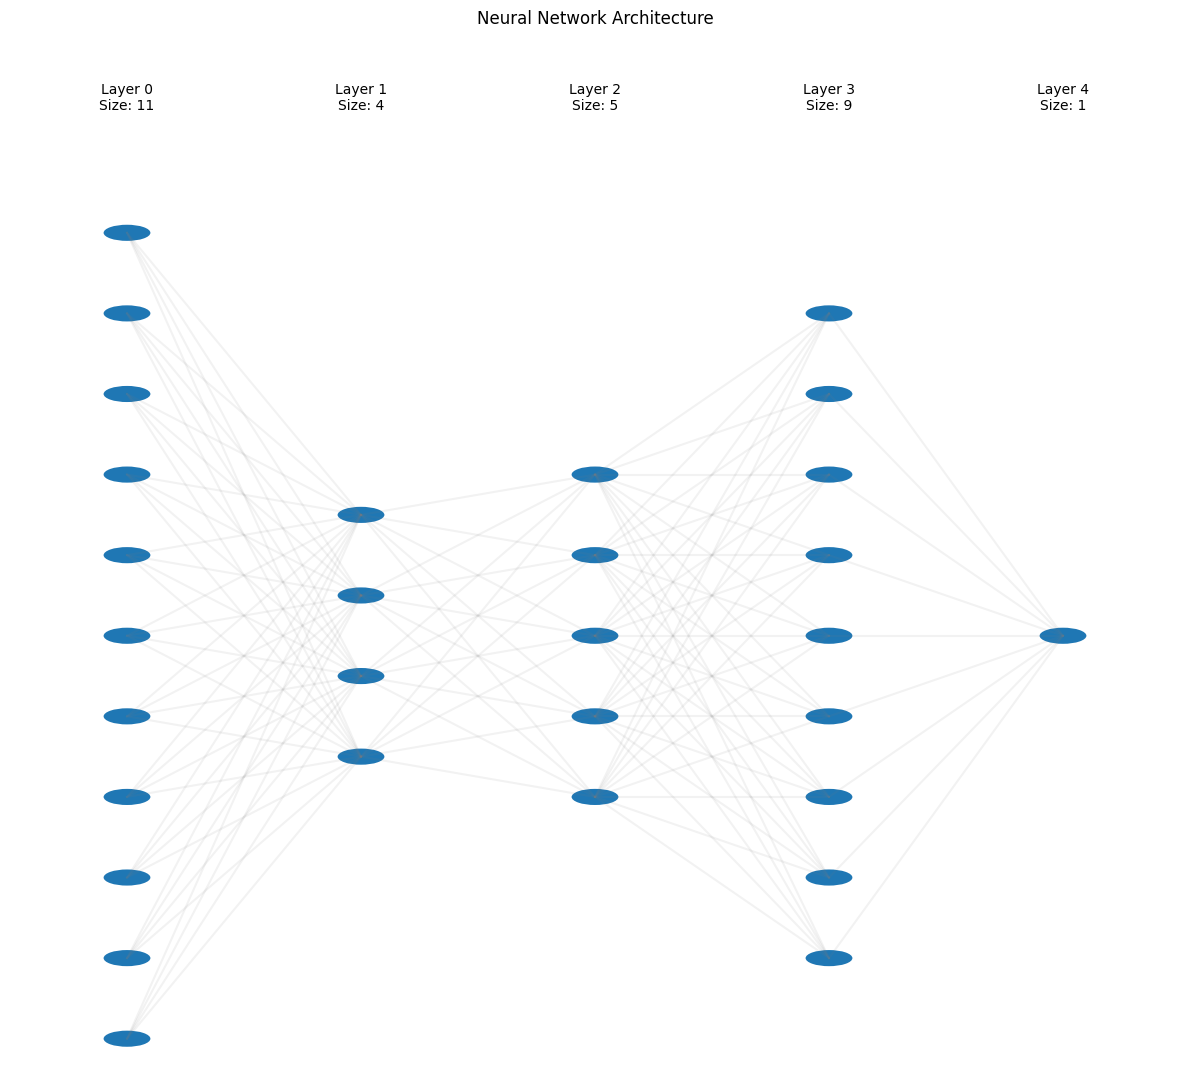

Layer outputs:
Layer 0 output shape: torch.Size([1, 4])
Layer 1 output shape: torch.Size([1, 5])
Layer 2 output shape: torch.Size([1, 9])
Layer 3 output shape: torch.Size([1, 1])
Final output: tensor([[-0.1058]], grad_fn=<AddmmBackward0>)


In [90]:
# Visualizing the output above. Ignore the code. Just look at the visual
import matplotlib.pyplot as plt

# Visualize the model architecture
def plot_model_architecture(model):
    layer_sizes = [11] + [layer.out_features for layer in model if isinstance(layer, nn.Linear)]
    
    fig, ax = plt.subplots(figsize=(12, 11))
    
    for i, size in enumerate(layer_sizes):
        x = i
        for j in range(size):
            y = j - size / 2
            ax.add_patch(plt.Circle((x, y), 0.1, fill=True))
        
        if i < len(layer_sizes) - 1:
            for j in range(size):
                for k in range(layer_sizes[i+1]):
                    ax.plot([x, x+1], [j-size/2, k-layer_sizes[i+1]/2], 'gray', alpha=0.1)
        
        # Add layer size text
        ax.text(x, max(layer_sizes)/2 + 0.5, f'Layer {i}\nSize: {size}', 
                ha='center', va='bottom')
    
    ax.set_xlim(-0.5, len(layer_sizes) - 0.5)
    ax.set_ylim(-max(layer_sizes)/2 - 0.5, max(layer_sizes)/2 + 1.5)  # Increased upper limit
    ax.axis('off')
    plt.title('Neural Network Architecture')
    plt.tight_layout()
    plt.show()

plot_model_architecture(model)

# Print the output of each layer
def print_layer_outputs(model, input_tensor):
    print("Layer outputs:")
    x = input_tensor
    for i, layer in enumerate(model):
        x = layer(x)
        print(f"Layer {i} output shape: {x.shape}")
    print(f"Final output: {x}")

print_layer_outputs(model, input_tensor)

Explanation for the code above-

Why do we need '1' at the end of the last linear layer?

![Exercise2.2-instruction1](../images/Exercise2.2-instruction1.png)

Here's why we use 1 as the output in the last layer?

***Purpose of Regression***: In regression, we're trying to predict a single continuous value. Think of it like predicting the price of a house or the temperature tomorrow.
Single Output: The last layer outputs just one number because that's all we need for regression. It's like having a single thermometer to measure temperature.
No Activation Function: Notice there's no activation function after the last layer. In regression, we often want the raw output value, which can be any real number.

### Instructions 2/2
A similar neural network to the one you just built is provided, containing four linear layers; update this network to perform a multi-class classification with four outputs.

In [91]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Implement a neural network with exactly four linear layers
model = nn.Sequential(
    nn.Linear(11, 4),
    nn.Linear(4, 5),
    nn.Linear(5, 9),
    nn.Linear(9, 4),
    nn.Softmax(dim=-1)
)

output = model(input_tensor)
print(output)

tensor([[0.1340, 0.6609, 0.0776, 0.1275]], grad_fn=<SoftmaxBackward0>)


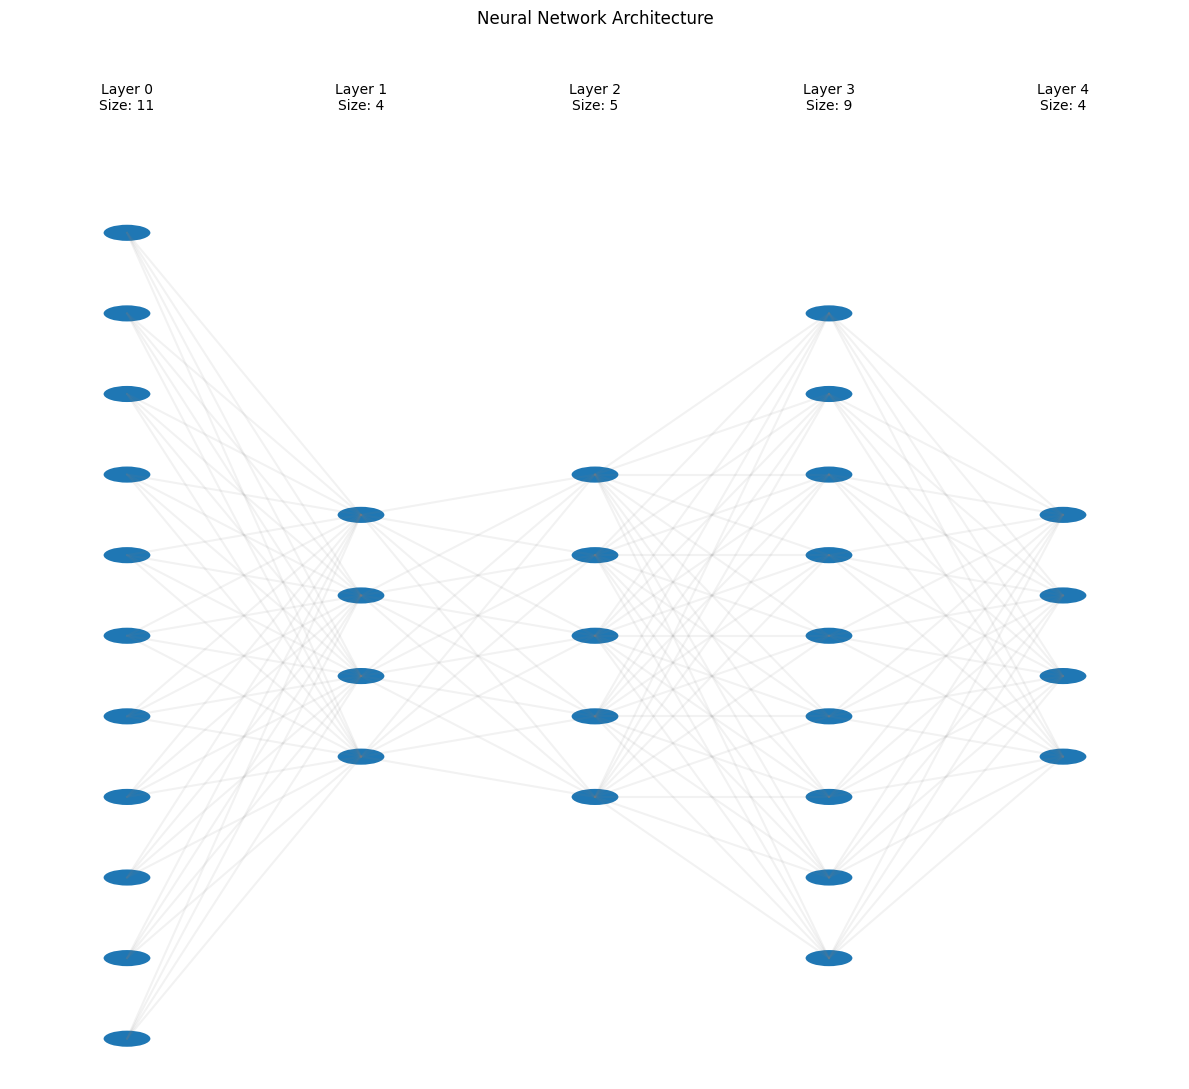

Layer outputs:
Layer 0 output shape: torch.Size([1, 4])
Layer 1 output shape: torch.Size([1, 5])
Layer 2 output shape: torch.Size([1, 9])
Layer 3 output shape: torch.Size([1, 4])
Layer 4 output shape: torch.Size([1, 4])
Final output: tensor([[0.1340, 0.6609, 0.0776, 0.1275]], grad_fn=<SoftmaxBackward0>)


In [92]:
# Visualizing the output above. Ignore the code. Just look at the visual
import matplotlib.pyplot as plt

# Visualize the model architecture
def plot_model_architecture(model):
    layer_sizes = [11] + [layer.out_features for layer in model if isinstance(layer, nn.Linear)]
    
    fig, ax = plt.subplots(figsize=(12, 11))
    
    for i, size in enumerate(layer_sizes):
        x = i
        for j in range(size):
            y = j - size / 2
            ax.add_patch(plt.Circle((x, y), 0.1, fill=True))
        
        if i < len(layer_sizes) - 1:
            for j in range(size):
                for k in range(layer_sizes[i+1]):
                    ax.plot([x, x+1], [j-size/2, k-layer_sizes[i+1]/2], 'gray', alpha=0.1)
        
        # Add layer size text
        ax.text(x, max(layer_sizes)/2 + 0.5, f'Layer {i}\nSize: {size}', 
                ha='center', va='bottom')
    
    ax.set_xlim(-0.5, len(layer_sizes) - 0.5)
    ax.set_ylim(-max(layer_sizes)/2 - 0.5, max(layer_sizes)/2 + 1.5)  # Increased upper limit
    ax.axis('off')
    plt.title('Neural Network Architecture')
    plt.tight_layout()
    plt.show()

plot_model_architecture(model)

# Print the output of each layer
def print_layer_outputs(model, input_tensor):
    print("Layer outputs:")
    x = input_tensor
    for i, layer in enumerate(model):
        x = layer(x)
        print(f"Layer {i} output shape: {x.shape}")
    print(f"Final output: {x}")

print_layer_outputs(model, input_tensor)

### Explanation for the code above

For the second part, we're adapting the model for multi-class classification. 

Here's why we change the last layer to output 4 values and add a Softmax:

![Exercise2.2-instruction2](../images/Exercise2.2-instruction2.png)

1. **Purpose of Classification**: In multi-class classification, we're trying to categorize input into one of several classes. Imagine sorting fruits into apples, oranges, bananas, and pears.

2. **Multiple Outputs**: The last layer now outputs 4 numbers because we have 4 possible classes. It's like having 4 baskets, one for each type of fruit.

3. **Softmax Activation**: We add a Softmax layer at the end. This turns the 4 numbers into probabilities that sum to 1. It's like saying, "There's a 70% chance this is an apple, 20% orange, 5% banana, and 5% pear."

4. **Why 4 Outputs**: The number of outputs in the last layer should match the number of classes in your problem. If you're classifying among 4 types of fruit, you need 4 outputs.

# Using Loss Functions to assess model predictions

### What is a Loss Function?
Imagine you're playing a game where you have to guess the price of different items. The loss function is like a scorekeeper that tells you how far off your guess was from the real price. The bigger the difference, the higher your "loss" or score.
In machine learning, the loss function does the same thing. It measures how wrong the model's predictions are compared to the actual correct answers.

### Why Do We Need Loss Functions?
Loss functions are super important because they help the machine learn. Here's how:
1. The machine makes a guess (prediction)
2. The loss function calculates how wrong the guess was
3. The machine uses this information to make better guesses next time
4. It takes in model prediction ŷ and ground truth y
It's like learning to shoot basketball free throws. Each time you miss, you adjust your technique based on how far off you were.

## Types of Loss Functions
There are different types of loss functions for different kinds of problems. Let's look at two main categories:

### Classification Loss Functions
These are used when we're trying to categorize things, like determining if an email is spam or not.
- Binary Cross-Entropy: This is used when there are only two categories (like spam or not spam). It measures how confident the model is in its correct predictions.
- Categorical Cross-Entropy: This is used when there are more than two categories (like classifying animals into dogs, cats, birds, etc.).

### Regression Loss Functions
These are used when we're trying to predict a number, like the price of a house or the temperature tomorrow.
- Mean Squared Error (MSE): This is like measuring the straight-line distance between your guess and the correct answer, then squaring it. It's good for most cases but can be sensitive to outliers (really wrong guesses).
- Mean Absolute Error (MAE): This just measures the straight-line distance without squaring. It's less sensitive to outliers.

### Loss Function in a formula
loss = F(y, ŷ)

Here we take the y which is our ground truth and ŷ as the prediction value as inputs which returns a numerical loss value.

## One Hot encoding
One Hot encoding is a technique used to convert categorical data into a format that machine learning models can understand and use effectively. 

### Here's how it works:

Instead of using a single number to represent a category, we create a new column for each possible category.

For each data point, we put a 1 in the column that represents its category, and 0s in all the other columns.

Let's use a simple example:

Imagine we have a dataset about fruits with three categories: apple, banana, and orange. Instead of assigning numbers like 1, 2, 3 to these fruits, we create three new columns:

| Is_Apple | Is_Banana | Is_Orange |
|----------|-----------|-----------|
| 1        | 0         | 0         |
| 0        | 1         | 0         |
| 0        | 0         | 1         |

This way:
- An apple is represented as [1, 0, 0]
- A banana is represented as [0, 1, 0]
- An orange is represented as [0, 0, 1]

### Why do we use One Hot encoding?
1. It prevents the model from assuming a natural order between categories. For example, if we used 1, 2, 3 for apple, banana, orange, the model might think bananas are "more than" apples and "less than" oranges, which isn't true.
2. It allows the model to treat each category independently, which can lead to better predictions.
3. It's compatible with many machine learning algorithms that expect numerical input.

In [93]:
import torch
from torch.nn import CrossEntropyLoss

scores = torch.tensor([[-0.1211, 0.1059]])

one_hot_target = torch.tensor([[1, 0]])

criterion = CrossEntropyLoss()

print('This is our loss function value:', criterion(scores.double(), one_hot_target.double()))

This is our loss function value: tensor(0.8131, dtype=torch.float64)


In [94]:
import torch
from torch.nn import CrossEntropyLoss

scores = torch.tensor([[-0.1211, 0.1059]])
one_hot_target = torch.tensor([[1, 0]])
criterion = CrossEntropyLoss()

loss_value = criterion(scores.double(), one_hot_target.double())
print('This is our loss function value:', loss_value)

print("\nLet's understand what this value means:")
print("0.0 - 0.3: Excellent! Model is very confident and correct")
print("0.3 - 0.5: Good! Model is learning well")
print("0.5 - 1.0: Okay, but needs improvement")
print("1.0 - 2.0: Poor performance, model is struggling")
print("> 2.0: Very poor, model might be making very confident wrong predictions")

if loss_value < 0.3:
    print("\n✨ Your current loss is EXCELLENT!")
elif loss_value < 0.5:
    print("\n✨ Your current loss is GOOD!")
elif loss_value < 1.0:
    print("\n✨ Your current loss is OKAY, but could be better")
elif loss_value < 2.0:
    print("\n✨ Your current loss needs significant improvement")
else:
    print("\n✨ Your current loss indicates serious problems")

This is our loss function value: tensor(0.8131, dtype=torch.float64)

Let's understand what this value means:
0.0 - 0.3: Excellent! Model is very confident and correct
0.3 - 0.5: Good! Model is learning well
0.5 - 1.0: Okay, but needs improvement
1.0 - 2.0: Poor performance, model is struggling
> 2.0: Very poor, model might be making very confident wrong predictions

✨ Your current loss is OKAY, but could be better


### Loss function takes:

- **scores**: Model predictions before the final softmax function
- **one_hot_target**: One-hot encoded ground truth label

### Loss function outputs:

- **loss**: A single float value

# ✨ **Our training goal is to minimize this loss!** The lower the loss, the better the model! ✨

## Exercise 2.3

### Creating one-hot encoded labels

One-hot encoding is a technique that turns a single integer label into a vector of N elements, where N is the number of classes in your dataset. This vector only contains zeros and ones. In this exercise, you'll create the one-hot encoded vector of the label y provided.

You'll practice doing this manually, and then make your life easier by leveraging the help of PyTorch! Your dataset contains three classes.

NumPy is already imported as np, and torch.nn.functional as F. The torch package is also imported.

- Manually create a one-hot encoded vector of the ground truth label y by filling in the NumPy array provided.
- Create a one-hot encoded vector of the ground truth label y using PyTorch.

In [95]:
import torch
import torch.nn.functional as F
import numpy as np

y = 1
num_classes = 3

# Create the one-hot encoded vector using NumPy
one_hot_numpy = np.array([0, 1, 0])

# Create the one-hot encoded vector using PyTorch
one_hot_pytorch = F.one_hot(torch.tensor(y), num_classes)

print(one_hot_numpy, 'and', one_hot_pytorch)

[0 1 0] and tensor([0, 1, 0])


## Exercise 2.4

### Calculating cross entropy loss
Cross entropy loss is the most used loss for classification problems. In this exercise, you will create inputs and calculate cross entropy loss in PyTorch. You are provided with the ground truth label y and a vector of scores predicted by your model.

You'll start by creating a one-hot encoded vector of the ground truth label y, which is a required step to compare y with the scores predicted by your model. Next, you'll create a cross entropy loss function. Last, you'll call the loss function, which takes scores (model predictions before the final softmax function), and the one-hot encoded ground truth label, as inputs. It outputs a single float, the loss of that sample.

### Instruction 1/3
Create the one-hot encoded vector of the ground truth label y and assign it to one_hot_label.

In [96]:
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), num_classes=4)

one_hot_label

tensor([[0, 0, 1, 0]])

### Instruction 2/3

Create the cross entropy loss function and store it as criterion.

In [97]:
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), num_classes = scores.shape[1])

# Create the cross entropy loss function
criterion = CrossEntropyLoss()

### Instruction 3/3

Calculate the cross entropy loss using the one_hot_label vector and the scores vector, by calling the loss_function you created.

In [98]:
import torch
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss

y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


# Using Derivatives to Update Model Parameters: A Treasure Hunt Analogy

![derivatives_analogy](../images/derivatives_analogy.png)

> Note: Gradient is often used interchangeably with the term "Derivative" in machine learning contexts.

## The Treasure Hunt Game: An Analogy for Gradient Descent

Imagine you're playing a unique video game where you must find a hidden treasure in a vast, hilly park while blindfolded. This game serves as an excellent analogy for how we train machine learning models using gradients.

### Game Rules:
1. Start at a random location in the park.
2. Feel the ground around you to determine the downhill direction.
3. Take a small step in that downhill direction.
4. Repeat steps 2 and 3 until you can't go any lower.

This process mirrors gradient descent in machine learning!

## Mapping the Game to Machine Learning Concepts

### The Park = The "Loss Landscape"
- In machine learning, we have a "loss landscape" instead of a physical park.
- The lowest point in this landscape represents the optimal model performance.

### You = The Learning Algorithm
- Just as you search for the treasure, the learning algorithm seeks the best way to make predictions.

### Feeling the Ground = Calculating Gradients
- When you feel the ground to determine the downhill direction, it's akin to calculating gradients in machine learning.
- Gradients indicate which direction will most improve our model.

### Taking Steps = Updating the Model
- Each step in the game is like updating the model's parameters (weights and biases).
- We aim to incrementally improve the model with each update.

### The Treasure = The Best Model
- The treasure at the lowest point represents the optimal version of our model, where it makes the most accurate predictions.

## Important Concepts

### Learning Rate = Step Size
In the game, the size of your steps is crucial:
- Tiny steps: You'll eventually reach the goal, but it might take a very long time.
- Huge leaps: You might overshoot and miss the lowest point entirely.

> In machine learning, we call this the "learning rate." It's similar to choosing your character's walking speed in the game.

### Local Minima = Small Dips
Imagine small holes in the park that aren't the true lowest point. In machine learning, we call these "local minima." They can trick us into thinking we've found the optimal solution when we haven't.

### Convergence = Finding the Treasure
When you finally reach the lowest point and find the treasure, that's called "convergence" in machine learning. It signifies that we've found the best version of our model.

## Why this is Fascinating

Just as this game helps you find treasure without visual cues, gradient descent enables computers to learn complex tasks autonomously. Some impressive applications include:

- Facial recognition in photos
- Language translation
- Playing sophisticated games like chess

The most remarkable aspect? The computer learns to perform these tasks independently, simply by taking small, calculated steps in the right direction, guided by gradients!

![Connecting-derivatives-and-model-training](../images/Connecting-derivatives-and-model-training.png)

## Below is an example of Backpropagation
---

I'll break down this code and explain what's happening in a simple way, using analogies where helpful.

## Overview
This code demonstrates a basic neural network that processes data through multiple layers and then learns from its mistakes using backpropagation. Think of it like a student solving a math problem, checking the answer, and then learning from their mistakes.

## Code Breakdown

### 1. Data Preparation
```python
sample = torch.tensor([
    [0.4823, -0.2314, 0.7651, -0.5982, 0.1245, 0.8976, -0.7634, 0.3217,
     -0.9012, 0.5678, -0.1543, 0.6789, 0.2345, -0.8765, 0.4321, -0.6543]
])
```
- This creates our input data with 16 numbers
- Think of these numbers as 16 different features about something we're trying to predict
- Like having 16 different pieces of information about a house (size, age, location, etc.) to predict its price

In [99]:
import torch
import torch.nn as nn

# Create a sample tensor with shape (1, 16) to match the input size of the first layer
sample = torch.tensor([
    [0.4823, -0.2314, 0.7651, -0.5982, 0.1245, 0.8976, -0.7634, 0.3217,
     -0.9012, 0.5678, -0.1543, 0.6789, 0.2345, -0.8765, 0.4321, -0.6543]
])

### 2. Model Architecture
```python
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)
```
This creates a neural network with three layers:
- First layer: Takes 16 inputs and produces 8 outputs
- Second layer: Takes those 8 values and produces 4 outputs
- Final layer: Takes 4 values and produces 2 outputs
It's like a funnel that gradually processes and condenses information.

In [100]:
# Create the model and run a forward pass
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

### 3. Forward Pass
```python
prediction = model(sample)
```
- This is where the data flows through our network
- Like a assembly line where each station (layer) processes the information
- The input goes through each layer, getting transformed until we get our final prediction



In [101]:
prediction = model(sample)

### 4. Loss Calculation and Backpropagation
```python
criterion = nn.CrossEntropyLoss()
target = torch.tensor([1])
loss = criterion(prediction, target)
loss.backward()
```
This is where the learning happens:
1. `criterion = nn.CrossEntropyLoss()`: Defines how we measure mistakes
   - Like having a scoring system to grade an answer
2. `target = torch.tensor()`: Sets the correct answer we're aiming for
3. `loss = criterion(prediction, target)`: Calculates how wrong our prediction was
4. `loss.backward()`: This is the magical part where the network learns
   - It's like tracing back through your work to find where you made mistakes
   - The network adjusts its internal numbers (weights and biases) to do better next time

In [102]:
# Calculate the loss and compute the gradients
criterion = nn.CrossEntropyLoss()
target = torch.tensor([1])  # Assuming a single target class for this example
loss = criterion(prediction, target)
loss.backward()

### 5. Accessing Gradients
```python
model[0].weight.grad, model[0].bias.grad
model[1].weight.grad, model[1].bias.grad
model[2].weight.grad, model[2].bias.grad
```
- These lines look at how much each part of the network needs to change
- Think of it as a report card for each layer, showing where improvements are needed
- The gradients tell us which direction and how much to adjust each parameter


In [103]:
# Access each layer's gradients
model[0].weight.grad, model[0].bias.grad
model[1].weight.grad, model[1].bias.grad
model[2].weight.grad, model[2].bias.grad

(tensor([[-0.0707, -0.0161,  0.2050, -0.0543],
         [ 0.0707,  0.0161, -0.2050,  0.0543]]),
 tensor([ 0.4731, -0.4731]))

## Understanding the Output of the code above ⬆︎

This output shows the gradients (suggested changes) for the weights and biases of one of the layers in your neural network. Let's break it down:

### First Part (Weight Gradients)
```python
tensor([[ 0.1811,  0.2281, -0.2075, -0.0432],
        [-0.1811, -0.2281,  0.2075,  0.0432]])
```
- This is a 2×4 matrix of gradients for the weights
- Each number represents how much and in which direction that particular weight should change
- Positive numbers suggest increasing the weight
- Negative numbers suggest decreasing the weight
- Notice how the second row is exactly opposite to the first row (same numbers but opposite signs)

### Second Part (Bias Gradients)
```python
tensor([ 0.5457, -0.5457])
```
- These are the gradients for the bias terms
- Again, they're opposite numbers (one positive, one negative)
- This suggests one bias needs to increase by 0.5457 while the other needs to decrease by the same amount

## Real-world Analogy

Imagine you're adjusting the controls of a radio:
- The weight gradients (first part) are like instructions for fine-tuning multiple knobs:
  - "Turn this knob up by 0.1811"
  - "Turn that knob down by 0.2075"
  - etc.
- The bias gradients (second part) are like the main volume controls:
  - "Turn the left speaker up by 0.5457"
  - "Turn the right speaker down by 0.5457"

The opposite signs in each row suggest this is likely the final layer of a binary classification problem, where the network is trying to decide between two categories. It's like a see-saw - when one side goes up, the other must go down by the same amount to maintain balance.

These numbers are relatively small, which is good - it means the network is suggesting subtle adjustments rather than dramatic changes. This is typical of a network that's learning properly.

Remember: These gradients are just suggestions for how to update the parameters. In actual training:
1. These values would be multiplied by a learning rate (usually a small number like 0.01)
2. The resulting values would then be used to update the actual weights and biases
3. This process would repeat many times with new data until the network learns effectively

In [104]:
# Learning rate is typically small
lr = 0.001

# Update the weights
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad

# Update the biases
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

bias

tensor([ 0.0566,  0.0739, -0.1505,  0.0997, -0.0820,  0.1738, -0.0234,  0.0563],
       grad_fn=<SubBackward0>)

![convex-and-non-convex-functions](../images/convex-and-non-convex-functions.png)

## Gradient descent
• For non-convex functions, we will use an iterative process such as gradient descent
• In PyTorch, an optimizer takes care of weight updates
• The most common optimizer is stochastic gradient descent (SGD)

Let me explain the most important PyTorch optimizers and their use cases in simple terms.

## Most Popular PyTorch Optimizers

**1. Adam (Adaptive Moment Estimation)**
- The most widely used optimizer that combines the best properties of other optimizers
- Best for:
  - Deep neural networks
  - Noisy data
  - Large datasets
  - When you're unsure which optimizer to use

**2. SGD (Stochastic Gradient Descent)**
- The classic, basic optimizer
- Best for:
  - Simple models
  - When you want predictable behavior
  - When you need to understand exactly how the model is learning

**3. AdamW**
- A variant of Adam that handles weight decay better
- Best for:
  - Large language models
  - Transfer learning
  - When regularization is important

**4. RMSprop**
- Adapts learning rates based on the magnitude of recent gradients
- Best for:
  - Recurrent Neural Networks (RNNs)
  - When dealing with non-stationary problems
  - Online learning scenarios

**5. Adagrad**
- Adapts learning rates for each parameter individually
- Best for:
  - Sparse data
  - Natural language processing tasks
  - When parameters need different learning rates

## How to Use Optimizers

Here's a simple pattern for using any optimizer in PyTorch:

```python
# Import the optimizer
from torch.optim import OptimizerName

# Create the optimizer
optimizer = Optimizer Name(
    model.parameters(),
    lr=learning_rate,
    other_parameters
)

# Training loop
optimizer.zero_grad()  # Clear gradients
loss.backward()       # Compute gradients
optimizer.step()      # Update weights
```

## Choosing the Right Optimizer

1. **Start with Adam**
- It's the most versatile and works well in most situations[2]
- Good default learning rate: 0.001

2. **Try SGD with momentum**
- If Adam isn't giving good results
- Often gives better final results but takes longer to train
- Good default learning rate: 0.01

3. **Consider AdamW**
- If you're working with large models
- When regularization is important
- Good default learning rate: 0.001

## Tips for Using Optimizers

1. **Learning Rate Matters**
- Start with the recommended default learning rate for each optimizer
- Use learning rate schedulers to adjust the rate during training

2. **Monitor Training**
- Watch the loss curve
- If loss is unstable: reduce learning rate
- If loss decreases too slowly: increase learning rate

3. **Combine with Proper Initialization**
- Good weight initialization helps optimizers work better
- Consider using techniques like Xavier or Kaiming initialization

Remember, the choice of optimizer can significantly impact your model's performance, but it's not the only factor. Good data preprocessing, model architecture, and hyperparameter tuning are equally important for successful training.

In [105]:
import torch.optim as optim

# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Exercise

### Estimating a sample
In previous exercises, you used linear layers to build networks.

Recall that the operation performed by nn.Linear() is to take an input 
 and apply the transformation 
, where 
 and 
 are two tensors (called the weight and bias).

A critical part of training PyTorch models is to calculate gradients of the weight and bias tensors with respect to a loss function.

In this exercise, you will calculate weight and bias tensor gradients using cross entropy loss and a sample of data.

The following tensors are provided:

weight: a 2 x 9 -element tensor
bias: a 2 -element tensor
preds: a 1 x 2 -element tensor containing the model predictions
target: a 1 x 2 -element one-hot encoded tensor containing the ground-truth label

### Instructions
- Use the criterion you have defined to calculate the loss value with respect to the predictions and target values.
- Compute the gradients of the cross entropy loss.
- Display the gradients of the weight and bias tensors, in that order.

In [106]:
import torch
import torch.nn as nn

# Given tensors (as specified in the problem)
weight = torch.randn(2, 9, requires_grad=True)
bias = torch.randn(2, requires_grad=True)

# Create preds using weight and bias to ensure it has a grad_fn
input_data = torch.randn(1, 9)  # Random input data
preds = torch.matmul(input_data, weight.t()) + bias
target = torch.tensor([[0, 1]])  # One-hot encoded ground-truth label

# Define the criterion (loss function)
criterion = nn.CrossEntropyLoss()

# Calculate the loss
loss = criterion(preds, target.float())

# Compute the gradients of the cross entropy loss
loss.backward()

# Display the gradients of the weight and bias tensors, in that order
print("Weight gradients:")
print(weight.grad)
print("\nBias gradients:")
print(bias.grad)

Weight gradients:
tensor([[-0.0279,  0.8420,  0.5403,  0.3917,  2.7796, -0.4396,  0.3951,  0.6509,
          0.1947],
        [ 0.0279, -0.8420, -0.5403, -0.3917, -2.7796,  0.4396, -0.3951, -0.6509,
         -0.1947]])

Bias gradients:
tensor([ 0.9026, -0.9026])


## Exercise

# Accessing the model parameters
A PyTorch model created with the nn.Sequential() is a module that contains the different layers of your network. Recall that each layer parameter can be accessed by indexing the created model directly. In this exercise, you will practice accessing the parameters of different linear layers of a neural network. You won't be accessing the sigmoid.

### Instructions
- Access the weight parameter of the first linear layer.
- Access the bias parameter of the second linear layer.

In [107]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Linear(8, 2))

# Access the weight of the first linear layer
weight_0 = model[0].weight
print(weight_0)

# Access the bias of the second linear layer
bias_1 = model[1].bias
print(bias_1)

Parameter containing:
tensor([[ 0.1007,  0.1355, -0.2420,  0.2254, -0.1193,  0.1145, -0.2189, -0.1516,
          0.0128, -0.1910, -0.0069, -0.0492,  0.1097, -0.0799, -0.1503,  0.1503],
        [-0.2119,  0.1658,  0.2477,  0.0999, -0.1780, -0.1281, -0.0017,  0.0128,
          0.1156,  0.1133, -0.2437,  0.1407, -0.0016, -0.0720,  0.1981, -0.2247],
        [-0.1265,  0.1194,  0.1715, -0.1262, -0.2085,  0.1956,  0.0744,  0.2443,
          0.1639, -0.1672, -0.0905,  0.0255,  0.1939, -0.0213, -0.2377,  0.1402],
        [-0.1421,  0.0942,  0.1761,  0.1638,  0.1388,  0.1220, -0.0867,  0.0498,
         -0.1881, -0.0315, -0.2321, -0.0553, -0.1652,  0.0274,  0.2247, -0.1296],
        [-0.0181, -0.1084, -0.1627, -0.0601,  0.2452, -0.2261,  0.1423, -0.0453,
         -0.1460,  0.1429, -0.1736, -0.1298,  0.1720, -0.1818, -0.1450, -0.0904],
        [ 0.0860, -0.1848,  0.0547,  0.0688,  0.0832,  0.2113,  0.0006,  0.0357,
          0.1193, -0.0926, -0.1847,  0.0498, -0.0193, -0.2232,  0.2341, -0.1690],


## Exercise

### Updating the weights manually
Now that you know how to access weights and biases, you will manually perform the job of the PyTorch optimizer. PyTorch functions can do what you're about to do, but it's helpful to do the work manually at least once, to understand what's going on under the hood.

A neural network of three layers has been created and stored as the model variable. This network has been used for a forward pass and the loss and its derivatives have been calculated. A default learning rate, lr, has been chosen to scale the gradients when performing the update.


Instructions (1/2)

1. Create the gradient variables by accessing the local gradients of each weight tensor.

In [108]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, 2))

weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

# Access the gradients of the weight of each linear layer
grads0 = weight0.grad
grads1 = weight1.grad
grads2 = weight2.grad

Instructions (2/2)

2. Update the weights using the gradients scaled by the learning rate.

In [109]:
# 1. Create your model
model = nn.Sequential(nn.Linear(16, 8),
                     nn.Linear(8, 4),
                     nn.Linear(4, 2))

# 2. Create some sample data
x = torch.randn(1, 16)  # Example input
target = torch.randn(1, 2)  # Example target

# 3. Forward pass
output = model(x)

# 4. Calculate loss
loss = nn.MSELoss()(output, target)

# 5. Backward pass
loss.backward()

# Now you can access the gradients!
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

grads0 = weight0.grad
grads1 = weight1.grad
grads2 = weight2.grad

# Update weights
lr = 0.001
weight0 = weight0 - lr * grads0
weight1 = weight1 - lr * grads1
weight2 = weight2 - lr * grads2

print(weight0)
print(weight1)
print(weight2)

tensor([[-0.1756,  0.2143, -0.0752,  0.1730,  0.0428, -0.1495, -0.1446, -0.1847,
          0.0558,  0.2422, -0.1796, -0.1354, -0.1894, -0.2357, -0.1578,  0.2356],
        [-0.1300, -0.1680, -0.0539, -0.1575,  0.0416,  0.2216,  0.1542,  0.2387,
          0.2489,  0.1631,  0.0762, -0.1955,  0.1099, -0.1975, -0.1411, -0.1353],
        [-0.0021,  0.2051,  0.0892,  0.1231, -0.0434,  0.0682,  0.1105,  0.1450,
         -0.1151,  0.1737, -0.0711,  0.2478, -0.0625,  0.1525, -0.2411,  0.1311],
        [-0.0559, -0.2201, -0.0776, -0.1542, -0.1778,  0.1919,  0.2357,  0.0771,
         -0.1939, -0.0925, -0.0486,  0.2414, -0.2246,  0.2333, -0.1585, -0.1417],
        [ 0.0357,  0.1407,  0.1312, -0.1572, -0.0731,  0.1397, -0.0980, -0.0729,
         -0.2488, -0.1927,  0.0387, -0.1141, -0.1218, -0.2272, -0.0885,  0.0258],
        [ 0.1934, -0.0135,  0.0656,  0.0805, -0.0890,  0.0421, -0.0442, -0.2401,
         -0.1542, -0.0465, -0.1058, -0.1043,  0.1991,  0.0336, -0.0590,  0.1905],
        [ 0.2330, -0.2

## Exercise

### Using the PyTorch optimizer
In the previous exercise, you manually updated the weight of a network. You now know what's going on under the hood, but this approach is not scalable to a network of many layers.

Thankfully, the PyTorch SGD optimizer does a similar job in a handful of lines of code. In this exercise, you will practice the last step to complete the training loop: updating the weights using a PyTorch optimizer.

A neural network has been created and provided as the model variable. This model was used to run a forward pass and create the tensor of predictions pred. The one-hot encoded tensor is named target and the cross entropy loss function is stored as criterion.

torch.optim as optim, and torch.nn as nn have already been loaded for you.

Instructions (1/2)

1. Use optim to create an SGD optimizer with a learning rate of your choice (must be less than one) for the model provided.

In [110]:
import torch.optim as optim

# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Instructions

2. Update the model's parameters using the optimizer.

In [111]:
# # Create the optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.001)

# loss = criterion(pred, target)
# loss.backward()

# # Update the model's parameters using the optimizer
# optimizer.step()

# Writing our first Training Loop!

### Training a neural network

1. Create a model
2. Choose a loss function
3. Create a dataset
4. Define an optimizer
5. Run a training loop, where for each sample of the dataset, we repeat:
   1. Calculating loss (forward pass)
   2. Calculating local gradients
   3. Updating model parameters

# Introducting the Mean Squared Error Loss 

## Understanding MSE with a Pizza Delivery Analogy

Imagine you're a pizza delivery person trying to get better at estimating delivery times. You tell customers how long their pizza will take, and you want to measure how good your predictions are.

Let's say for 3 deliveries:
- You predicted 20 minutes, but it took 25 minutes
- You predicted 30 minutes, but it took 28 minutes
- You predicted 15 minutes, but it took 18 minutes

MSE measures how "wrong" your predictions were by:
1. Finding the difference between prediction and actual time
2. Squaring these differences (to make negatives positive)
3. Taking the average

**Why squaring?** Think of it like this - if you're 5 minutes late or 5 minutes early, customers are equally unhappy. Squaring makes both positive and negative errors count the same way!

## PyTorch Implementation

Here's a simple example using PyTorch to calculate MSE for our pizza delivery predictions:

In [112]:
import torch
import torch.nn as nn

# Our pizza delivery predictions (in minutes)
predictions = torch.tensor([20.0, 30.0, 15.0])

# Actual delivery times (in minutes)
actual_times = torch.tensor([25.0, 28.0, 18.0])

# Create MSE loss function
mse_loss = nn.MSELoss()

# Calculate the loss
loss = mse_loss(predictions, actual_times)

print(f"Mean Squared Error: {loss.item():.2f}")

print(f"This means that on average the prediction were off by about {(loss.item()**0.5):.2f} minutes. (We calculated that by taking the square root of the Mean Squared Error value)")

Mean Squared Error: 12.67
This means that on average the prediction were off by about 3.56 minutes. (We calculated that by taking the square root of the Mean Squared Error value)


In machine learning, we use this number to help our model improve. The model will try to make this number as small as possible, just like a pizza delivery person trying to get better at estimating delivery times!

## Using the MSELoss
For regression problems, we often use Mean Squared Error (MSE) as a loss function instead of cross-entropy. MSE calculates the squared difference between predicted values (y_pred) and actual values (y). In this exercise, you'll compute MSE loss using both NumPy and PyTorch.

The torch package has been imported, along with numpy as np and torch.nn as nn.

- Calculate the MSELoss using NumPy.
- Create a MSELoss function using PyTorch.
- Convert y_pred and y to tensors and then float data types, and then use them to calculate MSELoss using PyTorch as mse_pytorch.

In [113]:
y_pred = np.array(10)
y = np.array(1)

# Calculate the MSELoss using NumPy
mse_numpy = np.mean((y_pred - y)**2)

# Create the MSELoss function
criterion = nn.MSELoss()

# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(torch.tensor(y_pred).float(), torch.tensor(y).float())
print(mse_pytorch)

tensor(81.)


# Some terminology before we move forward

### Epoch 
- If a variable called 'num_epoch' which defines the number of epochs = 3, this means we'll go through our entire dataset 3 times
- Each time through helps our model learn better, like how reading a chapter multiple times helps you understand it better
- Think of an epoch like a full study session of a textbook. When you're studying for a test, you might read through your textbook multiple times to really understand it. Each complete read-through is like one epoch.


Imagine you're reading that textbook, but instead of trying to memorize the whole book at once, you break it into smaller chunks (like chapters):
### batch_features 
- It is like getting a few math problems to solve

### batch_labels 
- It is like having the answers to those problems

### The dataloader
- It is like your study guide that organizes these problems and answers into manageable chunks

## Writing a training loop
In scikit-learn, the training loop is wrapped in the .fit() method, while in PyTorch, it's set up manually. While this adds flexibility, it requires a custom implementation.

In this exercise, you'll create a loop to train a model for salary prediction.

The show_results() function is provided to help you visualize some sample predictions.

The package imports provided are: pandas as pd, torch, torch.nn as nn, torch.optim as optim, as well as DataLoader and TensorDataset from torch.utils.data.

The following variables have been created: dataloader, containing the dataloader; model, containing the neural network; criterion, containing the loss function, nn.MSELoss(); optimizer, containing the SGD optimizer; and num_epochs, containing the number of epochs.

### Instructions (1/3)
- Write a for loop that iterates over the dataloader; this should be nested within a for loop that iterates over a range equal to the number of epochs.
- Set the gradients of the optimizer to zero.

In [114]:
# # Loop over the number of epochs and then the dataloader
# for epoch in range(num_epochs):
#     for batch_features, bath_labels in dataloader:
#         #Set the gradient to zero
#         optimizer.zero_grad()

The function -
```python
optimizer.zero_grad()
```

This is like erasing your scratch paper before solving a new math problem:
In PyTorch, gradients accumulate by default (like keeping all your old work on the scratch paper)
We need to clear them before each new calculation
If we didn't do this, it would be like trying to solve a new problem while still having all your old work cluttering your paper

### Instructions (2/3)

- Write the forward pass.
- Compute the MSE loss value using the criterion() function provided.
- Compute the gradients.

In [115]:
# # Loop over the number of epochs and the dataloader
# for i in range(num_epochs):
#   for data in dataloader:
#     # Set the gradients to zero
#     optimizer.zero_grad()
#     # Run a forward pass
#     feature, target = data
#     prediction = model(feature)
#     # Calculate the loss
#     loss = criterion(prediction, target)
#     # Compute the gradients
#     loss.backward()

### Instructions (3/3)

- Update the model's parameters.

In [116]:
# # Loop over the number of epochs and the dataloader
# for i in range(num_epochs):
#   for data in dataloader:
#     # Set the gradients to zero
#     optimizer.zero_grad()
#     # Run a forward pass
#     feature, target = data
#     prediction = model(feature)    
#     # Calculate the loss
#     loss = criterion(prediction, target)    
#     # Compute the gradients
#     loss.backward()
#     # Update the model's parameters
#     optimizer.step()
# show_results(model, dataloader)

# Section 3 - Neural Network Architecture and Hyperparameters
-----

Hyperparameters are parameters, often chosen by the user, that control model training. The type of activation function, the number of layers in the model, and the learning rate are all hyperparameters of neural network training. Together, we will discover the most critical hyperparameters of a neural network and how to modify them.

## Introducing ReLU (Rectified Linear Unit) and LeakyReLU
- ### These 2 are also Activation Functions like Sigmoid and SoftMax

## ReLU (Rectified Linear Unit)

Think of ReLU as a bouncer at a fancy nightclub who has one simple rule: "If you're under 0, you're not getting in!" Here's how it works:

- If a number is positive, the bouncer lets it pass through unchanged
- If a number is negative, the bouncer turns it into zero

Imagine you're playing with a light switch dimmer:
- When you push the dimmer up (positive values), the light gets brighter
- But when you try to push it below zero, instead of getting "negative light," the light just stays completely off

This is exactly what ReLU does - it's like a one-way street that only allows positive traffic.

**The Problem with ReLU**
Here's where it gets tricky. Sometimes, when ReLU keeps turning negative values to zero, it's like giving someone the silent treatment - they can't learn or improve because they're getting no feedback at all. Scientists call this the "dying ReLU problem".

## Leaky ReLU

Now, imagine instead of a strict bouncer, we have a more lenient one who says, "If you're under 0, I'll still let you in, but I'll make you really tiny first."

Think of Leaky ReLU like a leaky faucet:
- When it's turned on (positive values), water flows normally
- When it's turned off (negative values), it still drips a tiny bit of water instead of being completely dry

The "leak" is usually a small fraction (like 0.01) of the negative value that's allowed to pass through. It's like saying "Instead of completely ignoring negative values, let's at least listen to them a tiny bit."

**Why Leaky ReLU is Often Better**
Going back to our nightclub analogy:
- Regular ReLU is like a bouncer who completely ignores rejected people
- Leaky ReLU is like a bouncer who at least gives rejected people some feedback on why they were rejected, helping them improve for next time

This small change helps prevent the "dying" problem because even negative values get a chance to contribute and learn, just at a much smaller scale.

Think of it like learning from mistakes:
- ReLU completely ignores mistakes (negative values)
- Leaky ReLU learns a little bit even from mistakes, making it more resilient and adaptive

This is why Leaky ReLU often performs better in deep neural networks - it keeps all neurons "alive" and learning, even if they make mistakes along the way.

## Exercise

### Implementing ReLU
The rectified linear unit (or ReLU) function is one of the most common activation functions in deep learning.

It overcomes the training problems linked with the sigmoid function you learned, such as the vanishing gradients problem.

In this exercise, you'll begin with a ReLU implementation in PyTorch. Next, you'll calculate the gradients of the function.

The nn module has already been imported for you.

### Instructions (1/2)

- Create a ReLU function in PyTorch.

In [117]:
import torch
import torch.nn as nn

# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

### Instructions (2/2)

- Calculate the gradient of the ReLU function for x using the relu_pytorch() function you defined, then running a backward pass.
- Find the gradient at x.

In [118]:
import torch
import torch.nn as nn

# Create a ReLU function with PyTorch
relu_pytroch = nn.ReLU()

# Apply the ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)

y.backward()

#Print the gradient of the ReLU function for x
gradient = x.grad
print(gradient)

tensor(0.)


## Exercise

### Implementing leaky ReLU
You've learned that ReLU is one of the most used activation functions in deep learning. You will find it in modern architecture. However, it does have the inconvenience of outputting null values for negative inputs and therefore, having null gradients. Once an element of the input is negative, it will be set to zero for the rest of the training. Leaky ReLU overcomes this challenge by using a multiplying factor for negative inputs.

In this exercise, you will implement the leaky ReLU function in NumPy and PyTorch and practice using it. The numpy as np package, the torch package as well as the torch.nn as nn have already been imported.

### Instructions (1/2)

- Create a leaky ReLU function in PyTorch with a negative slope of 0.05.
- Call the function on the tensor x, which has already been defined for you.

In [119]:
import torch
import torch.nn as nn

# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)

# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


###  Parameter Counting

---
# Let's count the parameters in a neural network using a simple example:

### Here's the code we'll analyze:

```python
model = nn.Sequential(nn.Linear(8, 4),
                      nn.Linear(4, 2))
```

## The Restaurant Kitchen Model

Think of a neural network as a restaurant kitchen with multiple cooking stations (layers):

**First Layer (8 inputs → 4 stations)**
- You have 4 cooking stations (neurons)
- Each station receives ingredients from 8 suppliers (inputs)
- Each ingredient needs a measuring scale (weight)
- Each station also has a master seasoning control (bias)
- So each station needs: 8 measuring scales + 1 seasoning control = 9 parameters
- Total for all stations: 4 stations × 9 parameters = 36 parameters

**Second Layer (4 stations → 2 final plates)**
- You have 2 final plating stations (output neurons)
- Each receives dishes from all 4 cooking stations
- Each plating station needs 4 portion controls (weights)
- Each also has a final taste adjuster (bias)
- So each plating station needs: 4 portion controls + 1 taste adjuster = 5 parameters
- Total for plating: 2 stations × 5 parameters = 10 parameters

**Why This Matters**
- Just as a kitchen needs to know its equipment capacity, neural networks need to track their parameters
- Too few parameters (like too few cooking tools) = limited menu options
- Too many parameters (like too many unnecessary tools) = wasteful and harder to manage
- The right number of parameters (like a well-equipped kitchen) = efficient operation and good results

This kitchen setup, with its total of 46 parameters (cooking controls), represents the complete "recipe-making capability" of your neural network.

### Exercise

Counting the number of parameters
Deep learning models are famous for having a lot of parameters. Recent language models have billions of parameters. With more parameters comes more computational complexity and longer training times, and a deep learning practitioner must know how many parameters their model has.

In this exercise, you will calculate the number of parameters in your model, first manually, and then using PyTorch.

### Instructions (1/2)

- Calculate manually the number of parameters of the model below. How many does it have?

```python
model = nn.Sequential(nn.Linear(16, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))
```

In [120]:
print('The total number of parameters are', ((16+1)*4)+((4+1)*2)+((2+1)*1))

The total number of parameters are 81


### Instructions (2/2)

- Now, confirm your manual calculation by iterating through the model's parameters to update the total variable with the total number of parameters in the model.

In [121]:
import torch
import torch.nn as nn

model = nn.Sequential(nn.Linear(16, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, 1))

total = 0

# Calculate the number of parameters in the model
for p in model.parameters():
  total += p.numel()
  
print(f"The number of parameters in the model is {total}")

The number of parameters in the model is 81


### What the code above does

## Understanding the Parameter Counter

**Setting Up the Counter**
```python
total = 0
```
Think of `total = 0` like starting with an empty jar where you'll collect marbles. Before you start counting your marbles, you need to make sure your jar is empty. That's exactly what `total = 0` does - it creates our empty counting jar.

```python
for p in model.parameters():
  total += p.numel()
```

**Counting Loop (for p in model.parameters())**
Now, imagine your neural network model is like having several bags of marbles:
- Each layer (Linear) is like a separate bag
- Each bag contains different numbers of marbles (parameters)
- `p.numel()` is like counting the marbles in each bag
- `total += p.numel()` is like taking the count from each bag and adding it to our jar

Let's break down what happens in each iteration:
1. The loop looks at one bag (layer) at a time
2. Counts all the marbles (parameters) in that bag
3. Adds that number to our running total in the jar

This is important because in deep learning, we need to know how many parameters (or "marbles") our model has to:
- Understand how complex our model is
- Figure out how much memory it will need
- Know how much computing power we'll need to train it

### Exercise

### Manipulating the capacity of a network
In this exercise, you will practice creating neural networks with different capacities. The capacity of a network reflects the number of parameters in said network. To help you, a calculate_capacity() function has been implemented, as follows:

```python
def calculate_capacity(model):
  total = 0
  for p in model.parameters():
    total += p.numel()
  return total
```

This function returns the number of parameters in your model.

The dataset you are training this network on has n_features features and n_classes classes. The torch.nn package has been imported as nn.

### Instructions (1/2)
- Create a neural network with exactly three linear layers and less than 120 parameters, which takes n_features as inputs and outputs n_classes.

In [122]:
import torch
import torch.nn as nn

n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with less than 120 parameters
model = nn.Sequential(nn.Linear(n_features, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, n_classes))
output = model(input_tensor)

total = 0

# Calculate the number of parameters in the model
for p in model.parameters():
  total += p.numel()

total

118

### Instructions (2/2)

- Create a neural network with exactly four linear layers and more than 120 parameters, which takes n_features as inputs and outputs n_classes.

In [123]:
import torch
import torch.nn as nn

n_features = 8
n_classes = 2

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Create a neural network with less than 120 parameters
model = nn.Sequential(nn.Linear(n_features, 8),
                      nn.Linear(8, 4),
                      nn.Linear(4, 2),
                      nn.Linear(2, n_classes))
output = model(input_tensor)

total = 0

# Calculate the number of parameters in the model
for p in model.parameters():
  total += p.numel()

total

124

## Learning Rate and Momentum with SGD Optimizer (Stocahastic Gradient Descent)
----

Let me explain Stochastic Gradient Descent (SGD) optimization using a fun skiing analogy that will tie everything together!

## The Skiing Adventure of SGD

Imagine you're skiing down a mountain trying to reach the lowest point (which represents finding the minimum loss/error in our model). You're not a professional skier, so you need to make decisions about how to get down safely and efficiently.

## Learning Rate: Your Skiing Speed

The learning rate is like how fast you decide to ski down the mountain. Think of it as your speed control:

**Too High Learning Rate (Skiing Too Fast)**
- Like zooming down at dangerous speeds
- You might overshoot the bottom and crash
- In ML terms: Your model might miss the optimal solution and bounce around, never finding the best weights
- You might even "fly off the mountain" (model weights explode)
![Impact of the learning rate - high learning rate](../images/Impact-of-the-learning-rate-high-learning-rate.png)

**Too Low Learning Rate (Skiing Too Slowly)**
- Like inching down the mountain at a snail's pace
- You'll eventually get there, but it'll take forever
- In ML terms: Training will be very slow and might get stuck in small dips before reaching the bottom
![Impact of the learning rate - small learning rate](../images/Impact-of-the-learning-rate-small-learning-rate.png)

**Just Right Learning Rate**
- Moving at a controlled, steady pace
- Allows you to adjust your path while making good progress
- Typical values often start around 0.01 or 0.001

Let's continue with our skiing analogy to understand momentum in more detail!

## Understanding Momentum: The Skiing Inertia

Imagine you're wearing a heavy backpack while skiing. The weight of this backpack represents momentum - it affects how you move down the slope and how easily you can change direction.

## High Momentum (0.9 - 0.99)

**What It's Like**
- Like skiing with a heavy backpack
- Once you start moving in a direction, it's harder to make sudden turns
- You maintain more of your previous direction and speed

![high-momentum](../images/high-momentum.png)

**Benefits**
- Helps push through flat spots or small uphill sections
- Like using your built-up speed to glide over small bumps
- Great for escaping shallow valleys (local minima) in the loss landscape
- Training tends to be more stable and faster overall

**Potential Problems**
- Might overshoot the bottom of the slope
- Harder to make precise adjustments
- Like trying to stop quickly with a heavy backpack - it takes longer
- Could miss the optimal solution if it requires sharp turns

## Low Momentum (0.1 - 0.5)

**What It's Like**
- Like skiing with a light backpack
- Easier to make quick direction changes
- Less influenced by your previous movement

![low-momentum](../images/low-momentum.png)

**Benefits**
- More precise control over your movement
- Better for navigating tricky, winding paths
- Useful when you need to make careful adjustments
- Good for fine-tuning near the optimal solution

**Potential Problems**
- Might get stuck in small dips
- Progress can be slower
- Like stopping at every little bump in the snow
- More susceptible to getting trapped in local minima

## Zero Momentum (0.0)

**What It's Like**
- Like skiing with no backpack at all
- Each move is independent of previous moves
- Pure SGD without any memory of past updates

**When to Use It**
- When you want very precise control
- In simple landscapes with clear paths to the minimum
- When dealing with noisy or unpredictable data

## Real-World Scenarios

**High Momentum Works Best When**
- Your loss landscape is like a smooth, wide valley
- You're dealing with consistent patterns in your data
- You want faster convergence
- Like skiing down a long, gentle slope where you can use your momentum effectively

**Low Momentum Works Best When**
- Your loss landscape is tricky with lots of turns
- You're near the optimal solution and need precision
- Your data has lots of variation
- Like skiing through a technical course where you need careful control

## Common Momentum Values and Their Effects

| Momentum Value | Behavior | Best Used For |
|----------------|----------|---------------|
| 0.9 | Standard choice, good balance | Most training scenarios |
| 0.99 | Very aggressive momentum | Large datasets, smooth loss landscapes |
| 0.5 | Moderate momentum | When high momentum is too aggressive |
| 0.0 | No momentum | Precise control needed |

## Practical Tips

**Starting Out**
- Begin with momentum = 0.9
- Like starting on a gentler slope before tackling steeper ones
- Observe how your model behaves

**Adjusting Momentum**
- If training is unstable: Lower the momentum
- If training is too slow: Try increasing momentum
- If close to convergence: Consider reducing momentum for fine-tuning

**Warning Signs**
- If your loss is bouncing wildly: Your momentum might be too high
- If progress is very slow: Your momentum might be too low
- If you're overshooting repeatedly: Consider reducing both momentum and learning rate

Remember: Just like a skilled skier adjusts their technique based on the terrain, you'll need to adjust momentum based on your model's behavior and your training data's characteristics. The goal is to find that sweet spot where you're making steady progress while maintaining control!

## Finding the Right Balance

Just like a good skier needs to balance speed and control, you need to tune both parameters:

**Good Combination**
- Moderate learning rate with some momentum
- Like skiing with controlled speed while maintaining smooth motion
- Typically momentum values between 0.9 to 0.99 work well

**Bad Combinations to Avoid**
- High learning rate + high momentum = Like skiing too fast with no ability to stop
- Very low learning rate + no momentum = Like being stuck in deep snow
- High momentum + very low learning rate = Like trying to push through molasses

## Real-World Impact

**When It Works Well**
- Your model learns smoothly and consistently
- Training progress shows steady improvement
- Like a perfect ski run where you maintain control while making good progress

**When It Goes Wrong**
- Loss might oscillate wildly (too high learning rate)
- Training might take forever (too low learning rate)
- Model might get stuck (no momentum when needed)
- Like either tumbling down the mountain or never making it to the bottom

Remember: Just like becoming a good skier requires practice and adjusting your technique based on the slope, finding the right learning rate and momentum often requires experimentation based on your specific model and data. Start conservative (lower learning rate, moderate momentum) and adjust based on how your model performs!

### Exercise

Experimenting with learning rate
In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function x^4 + x^3 - 5x^2 in ten steps.

You will experiment with three different learning rate values. For this problem, try learning rate values between 0.001 to 0.1.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.

### Instructions (1/3)

- Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right.

In [124]:
# # Try a first learning rate value
# lr0 = 0.005
# optimize_and_plot(lr=lr0)

Instructions (1/3)

- Try a large learning rate value such that the optimizer skips past the global minimum at -2.

### Exercise

### Experimenting with momentum

- In this exercise, your goal is to find the optimal momentum such that the optimizer can find the minimum of the following non-convex function in 20 steps. You will experiment with two different momentum values. For this problem, the learning rate is fixed at 0.01.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 20 steps of the SGD optimizer and display the results.

### Instructions (1/2)

- Try a first value for the momentum such that the optimizer gets stuck in the first minimum.

In [125]:
# # Try a first value for momentum
# mom0 = 0
# optimize_and_plot(momentum=mom0)

### Instructions (2/2)

- Try a second value for momentum such that the optimizer finds the global optimum.

## Layer Initialization and Transfer Learning
-----

## Layer Initialization

Think of layer initialization like setting up a new video game character. When you start a new game, your character needs some basic stats (like strength, speed, health) to begin their journey.

**Why It's Important**
Imagine trying to play a video game where your character starts with completely random abilities - sometimes super strong, sometimes super weak. That would make the game very hard to play! Similarly, in neural networks, if we don't initialize our layers properly, our model might:
- Learn too slowly (like a character that's too weak to fight)
- Get stuck (like a character that can't move)
- Explode in values (like a character with infinite power that breaks the game)

## Transfer Learning

Now, this is like having an experienced older sibling teach you how to play a video game!

**The Basic Concept**
Imagine your sibling has already mastered a racing game. When you want to learn a new, similar racing game:
- They can teach you the basic controls
- Show you how to take turns
- Explain racing strategies
- You just need to learn the specific details of the new game

**How It Works in Machine Learning**
1. **Pre-trained Model**: This is like your experienced sibling (the model that already knows a lot)
2. **New Task**: This is your new game (the problem you want to solve)
3. **Transfer**: You take what the pre-trained model knows and adapt it to your needs

**Real-world Example**
Let's say you want to build a model that recognizes different types of cars. Instead of starting from scratch:
1. Take a model that's already trained to recognize objects in general
2. Keep its basic knowledge (like understanding edges, shapes, colors)
3. Teach it specifically about cars

This is much faster and more efficient than starting from zero - just like learning a game from an experienced player is faster than figuring everything out by yourself!

**When to Use It**
Transfer learning is super helpful when:
- You don't have lots of data (like getting game tips when you're just starting)
- You want to save training time (like skipping the basic tutorials)
- Your task is similar to something that's already been solved (like moving from one racing game to another)

Remember, just like in video games, you don't always have to start from level 1. Sometimes, you can build upon what others have already learned to reach your goals faster and more efficiently!

## Fine-tuning process
You are training a model on a new dataset and you think you can use a fine-tuning approach instead of training from scratch (i.e., training from randomly initialized weights).

To fine-tune a model on a new task, you need to follow a certain number of steps that are listed here.

- **Step 1:** Find a model trained on a similar task
- **Step 2:** Load pre-trained weights
- **Step 3:** Freeze (or not) some of the layers in the model
- **Step 4:** Train with a smaller learning rate
- **Step 5:** Look at the loss values and see if the learning rate needs to be adjusted

### Code example of Freezing layers of a model
You are about to fine-tune a model on a new task after loading pre-trained weights. The model contains three linear layers. However, because your dataset is small, you only want to train the last linear layer of this model and freeze the first two linear layers.

The model has already been created and exists under the variable model. You will be using the named_parameters method of the model to list the parameters of the model. Each parameter is described by a name. This name is a string with the following naming convention: x.name where x is the index of the layer.

Remember that a linear layer has two parameters: the weight and the bias. We are going to freeze the parameters of the first two layers of this model.

```python
for name, param in model.named_parameters():
  
    # Check if the parameters belong to the first layer
    if name == '0.weight' or name == '0.bias':
   
        # Freeze the parameters
        param.requires_grad = False
        
    # Check if the parameters belong to the second layer
    if name == '1.weight' or name == '1.bias':
      
        # Freeze the parameters
        param.requires_grad = False
```

> Choosing which layer to freeze is an empirical process but a good rule of thumb is to start with the first layers and go deeper.

## Exercise

### Layer initialization
The initialization of the weights of a neural network has been the focus of researchers for many years. When training a network, the method used to initialize the weights has a direct impact on the final performance of the network.

As a machine learning practitioner, you should be able to experiment with different initialization strategies. In this exercise, you are creating a small neural network made of two layers and you are deciding to initialize each layer's weights with the uniform method.

### Instructions

- For each layer (```layer0```and ```layer1```), use the uniform initialization method to initialize the weights.


In [126]:
import torch
import torch.nn as nn

layer0 = nn.Linear(16, 32)
layer1 = nn.Linear(32, 64)

# Use uniform initialization for layer0 and layer1 weights
nn.init.uniform_(layer0.weight)
nn.init.uniform_(layer1.weight)

model = nn.Sequential(layer0, layer1)

# Loading Data
-----

In [127]:
import pandas as pd
import numpy as np

# Create a dictionary with the data
animals = {
    'animal_name': ['skimmer', 'gull', 'seahorse', 'tuatara', 'squirrel'],
    'hair': [0, 0, 0, 0, 1],
    'feathers': [1, 1, 0, 0, 0],
    'eggs': [1, 1, 1, 1, 0],
    'milk': [0, 0, 0, 0, 1],
    'predator': [1, 1, 0, 1, 0],
    'fins': [0, 0, 1, 0, 0],
    'legs': [2, 2, 0, 4, 2],
    'tail': [1, 1, 1, 1, 1],
    'type': [2, 2, 4, 3, 1]
}

# Create a DataFrame from the dictionary
animals = pd.DataFrame(animals)

# Display the DataFrame
print(animals)



  animal_name  hair  feathers  eggs  milk  predator  fins  legs  tail  type
0     skimmer     0         1     1     0         1     0     2     1     2
1        gull     0         1     1     0         1     0     2     1     2
2    seahorse     0         0     1     0         0     1     0     1     4
3     tuatara     0         0     1     0         1     0     4     1     3
4    squirrel     1         0     0     1         0     0     2     1     1


In [128]:
# Define input features
features = animals.iloc[:, 1:-1]
X = features.to_numpy()
print(X)

[[0 1 1 0 1 0 2 1]
 [0 1 1 0 1 0 2 1]
 [0 0 1 0 0 1 0 1]
 [0 0 1 0 1 0 4 1]
 [1 0 0 1 0 0 2 1]]


In [129]:
# Define target features (ground truth)
target = animals.iloc[:, -1]
y = target.to_numpy()

In [130]:
import torch
from torch.utils.data import TensorDataset

# Instantiate dataset class
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

# Access an individual sample
sample = dataset[0]
input_sample, label_sample = sample
print('input sample:', input_sample)
print('label_sample:', label_sample)

input sample: tensor([0., 1., 1., 0., 1., 0., 2., 1.])
label_sample: tensor(2.)


In [131]:
from torch.utils.data import DataLoader

batch_size = 2
shuffle = True

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print('batch inputs', batch_inputs)
    print('batch labels', batch_labels)

batch inputs tensor([[0., 0., 1., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 1., 0., 2., 1.]])
batch labels tensor([4., 2.])
batch inputs tensor([[0., 0., 1., 0., 1., 0., 4., 1.],
        [1., 0., 0., 1., 0., 0., 2., 1.]])
batch labels tensor([3., 1.])
batch inputs tensor([[0., 1., 1., 0., 1., 0., 2., 1.]])
batch labels tensor([2.])


## Exercise
----

Using the TensorDataset class
In practice, loading your data into a PyTorch dataset will be one of the first steps you take in order to create and train a neural network with PyTorch.

The TensorDataset class is very helpful when your dataset can be loaded directly as a NumPy array. Recall that TensorDataset() can take one or more NumPy arrays as input.

In this exercise, you'll practice creating a PyTorch dataset using the TensorDataset class.

torch and numpy have already been imported for you, along with the TensorDataset class.

### Instructions
- Convert the NumPy arrays provided to PyTorch tensors.
- Create a TensorDataset using the torch_features and the torch_target tensors provided (in this order).
- Return the last element of the dataset.

In [132]:
import numpy as np
import torch
from torch.utils.data import TensorDataset

np_features = np.array(np.random.rand(12, 8))
np_target = np.array(np.random.rand(12, 1))

# Convert arrays to PyTorch tensors
torch_features = torch.tensor(np_features)
torch_target = torch.tensor(np_target)

# Create a TensorDataset from two tensors
dataset = TensorDataset(torch_features, torch_target)

# Return the last element of this dataset
print(dataset[-1])

(tensor([0.2829, 0.2822, 0.0770, 0.3640, 0.9413, 0.4576, 0.7154, 0.0449],
       dtype=torch.float64), tensor([0.4225], dtype=torch.float64))


## Exercise

### From data loading to running a forward pass
In this exercise, you'll create a PyTorch DataLoader from a pandas DataFrame and call a model on this dataset. Specifically, you'll run a forward pass on a neural network. You'll continue working with fully connected neural networks, as you have done so far.

You'll begin by subsetting a loaded DataFrame called dataframe, converting features and targets NumPy arrays, and converting to PyTorch tensors in order to create a PyTorch dataset.

This dataset can be loaded into a PyTorch DataLoader, batched, shuffled, and used to run a forward pass on a custom fully connected neural network.

NumPy as np, pandas as pd, torch, TensorDataset(), and DataLoader() have been imported for you

### Instructions (1/3)

Extract the features (ph, Sulfate, Conductivity, Organic_carbon) and target (Potability) values and load them into the appropriate tensors to represent features and targets.
Use both tensors to create a PyTorch dataset using the dataset class that's quickest to use when tensors don't require any additional preprocessing.

In [133]:
# # Load the different columns into two PyTorch tensors
# features = torch.tensor(dataframe[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']].to_numpy()).float()
# target = torch.tensor(dataframe['Potability'].to_numpy()).float()

# # Create a dataset from the two generated tensors
# dataset = TensorDataset(features, target)

### Instructions 2/3

Create a PyTorch DataLoader from the created TensorDataset; this DataLoader should use a batch_size of two and shuffle the dataset.

In [134]:
# # Load the different columns into two PyTorch tensors
# features = torch.tensor(dataframe[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']].to_numpy()).float()
# target = torch.tensor(dataframe['Potability'].to_numpy()).float()

# # Create a dataset from the two generated tensors
# dataset = TensorDataset(features, target)

# # Create a dataloader using the above dataset
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
# x, y = next(iter(dataloader))

### Instructions 3/3

- Implement a small, fully connected neural network using exactly two linear layers and the nn.Sequential() API, where the final output size is 1.

In [135]:
# # Load the different columns into two PyTorch tensors
# features = torch.tensor(dataframe[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']].to_numpy()).float()
# target = torch.tensor(dataframe['Potability'].to_numpy()).float()

# # Create a dataset from the two generated tensors
# dataset = TensorDataset(features, target)

# # Create a dataloader using the above dataset
# dataloader = DataLoader(dataset, shuffle=True, batch_size=2)
# x, y = next(iter(dataloader))

# # Create a model using the nn.Sequential API
# model = nn.Sequential(
#   nn.Linear(4, 16), 
#   nn.Linear(16, 1)
# )

# output = model(features)
# print(output)

# Model Evaluation
---

## The Three Stages of Learning: Training, Validation and Testing

Imagine you have a big cookbook with 100 recipes. Here's how we'd split them to teach Tommy:

**Training Set (60-80 recipes)**
Think of this as Tommy's practice kitchen. This is where he learns and makes mistakes:
- Tommy practices cooking these recipes over and over
- He learns the basic techniques
- He burns some dishes and overcooks others
- Just like how our ML model learns patterns from training data

**Validation Set (10-20 recipes)**
This is like having Tommy cook for his family before the big restaurant opening:
- His family gives feedback on the taste
- He adjusts his cooking style based on their comments
- He might realize he's using too much salt or cooking too fast
- Similarly, we use validation data to fine-tune our model's settings (hyperparameters)

**Test Set (10-20 recipes)**
This is like Tommy's final exam in cooking school:
- These are completely new recipes he's never seen
- He can't get feedback or make adjustments
- This shows if he truly learned to cook or just memorized recipes
- Just like how we use test data to see if our model can handle new, unseen data

## Why This Split is Important

Think of it this way:
- If Tommy only practiced on the same 3 recipes (too little training data), he wouldn't become a good chef
- If he got feedback on his final exam recipes (using test data for training), it wouldn't be a fair test
- If his family gave him too many tips during practice (overfitting to validation data), he might not learn to cook independently

## Real-World Example

Just like how a student can't prepare for an exam using the actual test questions, our model shouldn't see the test data during training. Imagine if Tommy memorized exactly how to make a chocolate cake, but then the test asks him to make a vanilla cake - he needs to understand the general principles of baking, not just memorize one recipe.

This three-way split helps ensure our model (like Tommy) truly learns to generalize and can handle new, unseen situations rather than just memorizing the training data.

## Exercise

### Writing the evaluation loop
In this exercise, you will practice writing the evaluation loop. Recall that the evaluation loop is similar to the training loop, except that you will not perform the gradient calculation and the optimizer step.

The model has already been defined for you, along with the object validationloader, which is a dataset.

### Instructions (1/2)
- Set the model to evaluation mode.
- Sum the current batch loss to the validation_loss variable.

In [136]:
# # Set the model to evaluation mode
# model.eval()
# validation_loss = 0.0

# with torch.no_grad():
  
#   for data in validationloader:
    
#       outputs = model(data[0])
#       loss = criterion(outputs, data[1])
      
#       # Sum the current loss to the validation_loss variable
#       validation_loss += loss.item()

### Instructions (2/2)

- Calculate the mean loss value for the epoch.
- Set the model back to training mode.

In [137]:
# # Set the model to evaluation mode
# model.eval()
# validation_loss = 0.0

# with torch.no_grad():
  
#   for data in validationloader:
    
#       outputs = model(data[0])
#       loss = criterion(outputs, data[1])
      
#       # Sum the current loss to the validation_loss variable
#       validation_loss += loss.item()
      
# # Calculate the mean loss value
# validation_loss_epoch = validation_loss / len(validationloader)
# print(validation_loss_epoch)

# # Set the model back to training mode
# model.train()


## Exercise

### Calculating accuracy using torchmetrics
In addition to the losses, you should also be keeping track of the accuracy during training. By doing so, you will be able to select the epoch when the model performed the best.

In this exercise, you will practice using the torchmetrics package to calculate the accuracy. You will be using a sample of the facemask dataset. This dataset contains three different classes. The plot_errors function will display samples where the model predictions do not match the ground truth. Performing such error analysis will help you understand your model failure modes.

The torchmetrics package is already imported. The model outputs are the probabilities returned by a softmax as the last step of the model. The labels tensor contains the labels as one-hot encoded vectors.

### Instructions (1/2)

- Create an accuracy metric for a "multiclass" problem with three classes.
- Calculate the accuracy for each batch of the dataloader.

In [138]:
# # Create accuracy metric using torch metrics
# metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)
# for data in dataloader:
#     features, labels = data
#     outputs = model(features)
    
#     # Calculate accuracy over the batch
#     acc = metric(outputs, labels.argmax(dim=-1))
# acc

### Instructions (2/2)

- Calculate accuracy for the epoch.
- Reset the metric for the next epoch.

In [139]:
# # Create accuracy metric using torch metrics
# metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)
# for data in dataloader:
#     features, labels = data
#     outputs = model(features)
    
#     # Calculate accuracy over the batch
#     acc = metric(outputs, labels.argmax(dim=-1))
    
# # Calculate accuracy over the whole epoch
# acc = metric.compute()

# # Reset the metric for the next epoch (training or validation)
# metric.reset()
# plot_errors(model, dataloader)

# Overfitting and Underfitting Models
---

## The Story of Three Students

Imagine three students preparing for their math tests: Mary (who overfits), Johnny (who underfits), and Sarah (who gets it just right).

## Overfitting: Meet Mary the Memorizer

Think of Mary as a student who **memorizes everything** without understanding the concepts:
- She memorizes every single math problem from the textbook
- She knows that "2 + 3 = 5" and "4 + 6 = 10"
- But when she sees "7 + 8", she's stuck because she never memorized this exact problem

This is like overfitting in machine learning where:
- The model learns the training data too perfectly
- It memorizes even the noise and random fluctuations
- It performs great on known data but fails on new problems
- It's like having a GPS that only knows one route to school and gets lost if there's road construction

**Signs of Overfitting:**
- Perfect performance on training data
- Poor performance on new data
- The model becomes too complex and specific

## Underfitting: Meet Johnny the Generalizer

Johnny represents the opposite problem:
- He only learns that "numbers can be added together"
- He doesn't practice enough problems
- He doesn't learn any specific techniques or patterns

This is like underfitting in machine learning where:
- The model is too simple
- It doesn't capture important patterns in the data
- It performs poorly on both training and new data
- It's like having a GPS that only knows "go north" or "go south" without understanding streets

**Signs of Underfitting:**
- Poor performance on training data
- Poor performance on new data
- The model is too simple and misses obvious patterns

## Just Right: Meet Sarah the Smart Learner

Sarah represents the perfect balance:
- She learns the rules and patterns of math
- She understands why "2 + 3 = 5"
- She can solve new problems using her understanding
- She practices enough but doesn't just memorize

This is the sweet spot we want in machine learning where:
- The model learns genuine patterns
- It ignores random noise in the data
- It performs well on both old and new data
- It's like having a GPS that knows multiple routes and can handle detours

## Why It Matters

Finding the right balance is crucial because:
- Too simple (underfitting) = missing important patterns
- Too complex (overfitting) = learning noise instead of patterns
- Just right = model that can generalize and make good predictions

# Fighting Overfitting
----

Here are three of the many techniques for fighting overfitting:

## Weight Decay: The "Lazy Student" Method

Think of weight decay like forcing a student to take the simplest path to solve a problem:
- Without weight decay: A student writes a 10-page solution for a simple addition problem
- With weight decay: The student is encouraged to write shorter, simpler solutions

It's like telling the model: "Don't try too hard!"
- It penalizes large weights in the model
- Makes the model prefer simpler solutions
- Like Occam's Razor: the simplest solution is often the best

## Data Augmentation: The "Study Buddy" Method

Imagine you're studying for a test:
- Original way: You only study the exact questions in your textbook
- Augmented way: You study similar questions with slight variations

It's like showing your model the same picture in different ways:
- Flip the image
- Rotate it slightly
- Change the brightness
- Add some noise

Real-world example:
- Teaching a model to recognize cats
- Original: Show one picture of a cat
- Augmented: Show the same cat upside down, slightly blurry, in different lighting
- This helps the model learn "cat-ness" rather than memorizing specific cat pictures

## Dropout: The "Pop Quiz" Method

Think of dropout like randomly covering parts of your textbook while studying:
- Each time you practice, some random words are covered up
- You learn to understand the full concept without relying on specific words

It's like training your brain to work with incomplete information:
- During training, randomly turn off some neurons
- Forces the model to not rely too heavily on any single feature
- Like having multiple backup plans

Real-world example:
- Learning to recognize a car
- Without dropout: The model might only look for wheels
- With dropout: The model learns to look for wheels, windows, doors, etc.
- If it can't see the wheels, it can still recognize the car from other features

## Why Use All Three?

Think of it like training for a sport:
- **Weight Decay**: Don't over-complicate your moves
- **Data Augmentation**: Practice in different conditions (rain, sun, wind)
- **Dropout**: Train different muscle groups so you don't rely on just one

Together, these techniques help your model become more robust and generalize better, just like a well-rounded athlete who can perform in any condition!

## Exercise
---

### Experimenting with dropout
The dropout layer randomly zeroes out elements of the input tensor. Doing so helps fight overfitting. In this exercise, you'll create a small neural network with one linear layer, one dropout layer, and one activation function.

The torch.nn package has already been imported as nn. An input_tensor of dimensions 
 has been created for you.

### Instructions (1/2)

- Create a small neural network with one linear layer, one ReLU function, and one dropout layer, in that order.
The model should take input_tensor as input and return an output of size 16.

In [140]:
# # Create a small neural network
# model = nn.Sequential(nn.Linear(3072, 16),
#                       nn.ReLU(),
#                       nn.Dropout())
# model(input_tensor)

### Instructions (2/2)

- Using the same neural network, set the probability of zeroing out elements in the dropout layer to 0.8.

In [141]:
# # Using the same model, set the dropout probability to 0.8
# model = nn.Sequential(nn.Linear(3072, 16),
#                       nn.ReLU(),
#                       nn.Dropout(p=0.8))
# model(input_tensor)

# Improving Model Performance
----

## Step 1: Establish a Baseline
Think of this like learning to play basketball. Before trying fancy moves, you want to make sure you can make basic shots when practicing alone. In machine learning:
- First, let your model practice extensively on your training data
- If it can't perform well even on the practice data, it's like not being able to make shots in an empty gym
- This tells you if your "player" (model) has the basic ability to learn the task

## Step 2: Reduce Overfitting
This is like making sure you can play well in real games, not just practice. Imagine a player who only knows how to shoot from one specific spot - they're "overfitting" to that position:
- Add "training rules" (regularization) to make your model more flexible
- Watch how it performs in "practice games" (validation set)
- Make sure it can handle new situations it hasn't seen before

## Step 3: Optimize Hyperparameters
This is like fine-tuning your training routine:
- Adjusting how fast you learn (learning rate)
- Deciding how many practice shots to take before getting feedback (batch size)
- Choosing the right training equipment and exercises (network architecture)

The Continuous Process:
Just like in sports, getting better is an ongoing process. You might need to:
- Practice with more different situations (more training data)
- Try different training techniques (different model architectures)
- Keep track of your progress and adjust your training plan

Remember: The key is to first make sure your model can learn at all, then make sure it can handle new situations, and finally fine-tune it to perform its best. It's like learning any skill - start with the basics, make sure you can apply them broadly, and then work on perfecting your technique.

## Exercise
---

### Implementing random search
Hyperparameter search is a computationally costly approach to experiment with different hyperparameter values. However, it can lead to performance improvements. In this exercise, you will implement a random search algorithm.

You will randomly sample 10 values of the learning rate and momentum from the uniform distribution. To do so, you will use the np.random.uniform() function.

The numpy package has already been imported as np.

### Instructions

- Randomly sample a learning rate factor between 2 and 4 so that the learning rate (lr) is bounded between 10^-2 and 10^-4.
- Randomly sample a momentum between 0.85 and 0.99.

In [142]:
# values = []
# for idx in range(10):
#     # Randomly sample a learning rate factor 2 and 4
#     factor = np.random.uniform(2, 4)
#     lr = 10 ** -factor
    
#     # Randomly sample a momentum between 0.85 and 0.99
#     momentum = np.random.uniform(0.85, 0.99)
    
#     values.append((lr, momentum))